Data Loading and prepearing

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/globa_superstore.csv', encoding='unicode_escape')

data.head()

,Unnamed: 0,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,order year,order_month,ship year,ship_month,unit_price,Regular_price
0,0,32298,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,0.0,762.1845,933.57,Critical,2012,7,2012,7,329.950,329.95
1,1,26341,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,0.1,-288.7650,923.63,Critical,2013,2,2013,2,412.155,457.95
2,2,25330,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,0.1,919.9710,915.49,Medium,2013,10,2013,10,575.019,638.91
3,3,13524,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,0.1,-96.5400,910.16,Medium,2013,1,2013,1,578.502,642.78
4,4,47221,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,0.0,311.5200,903.04,Critical,2013,11,2013,11,354.120,354.12


In [3]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
data_arima = data.copy(deep=True)

Choose a category

In [ ]:
#data_acc = data_arima.loc[data_arima['Sub-Category'] == 'Tables']
data_acc = data_arima.loc[data_arima['Segment'] == 'Coeporate']
#data_acc = data_acc.loc[data_arima['Sub-Category'] == 'Phones']

# discounts by category

In [5]:
data_acc = data_arima.loc[data_arima['Sub-Category'] == 'Tables']

In [6]:
data_disc_acc = data_acc[['Order Date', 'Discount']].copy(deep=True)

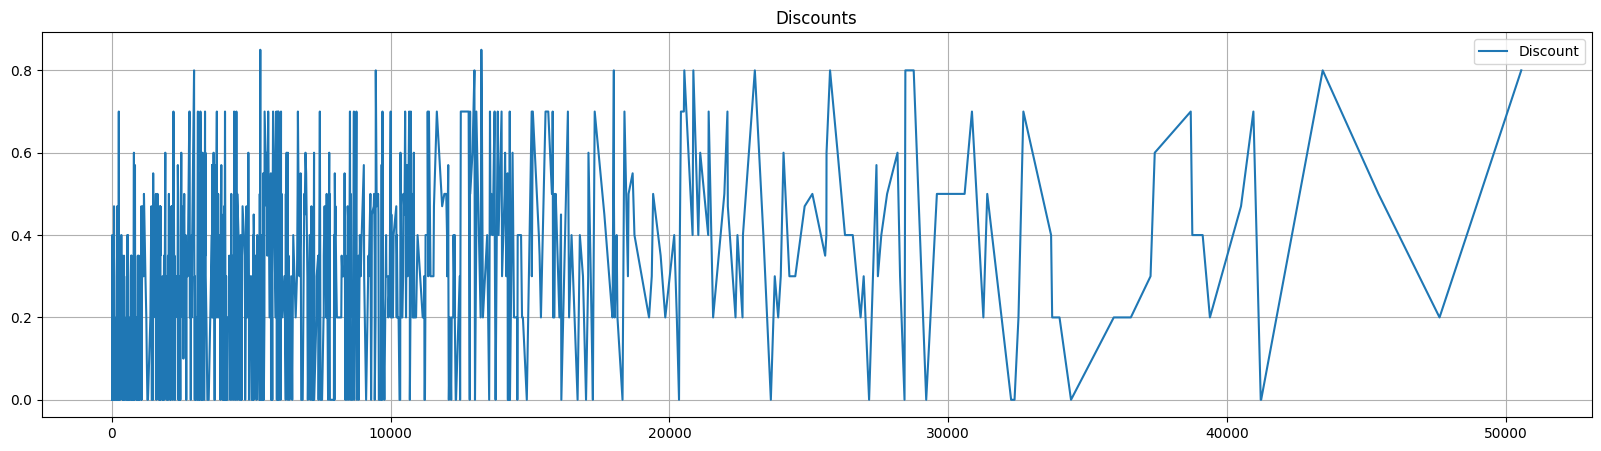

In [ ]:
data_disc_acc.plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.title('Discounts')
plt.show(block=False)

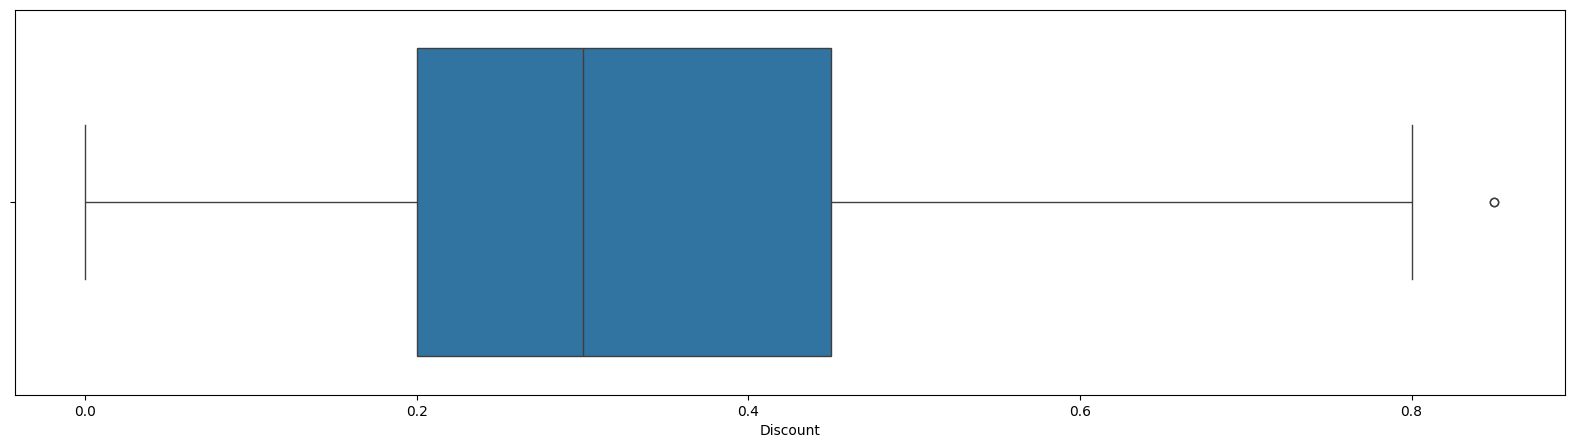

In [ ]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data_disc_acc['Discount'],whis=1.5)

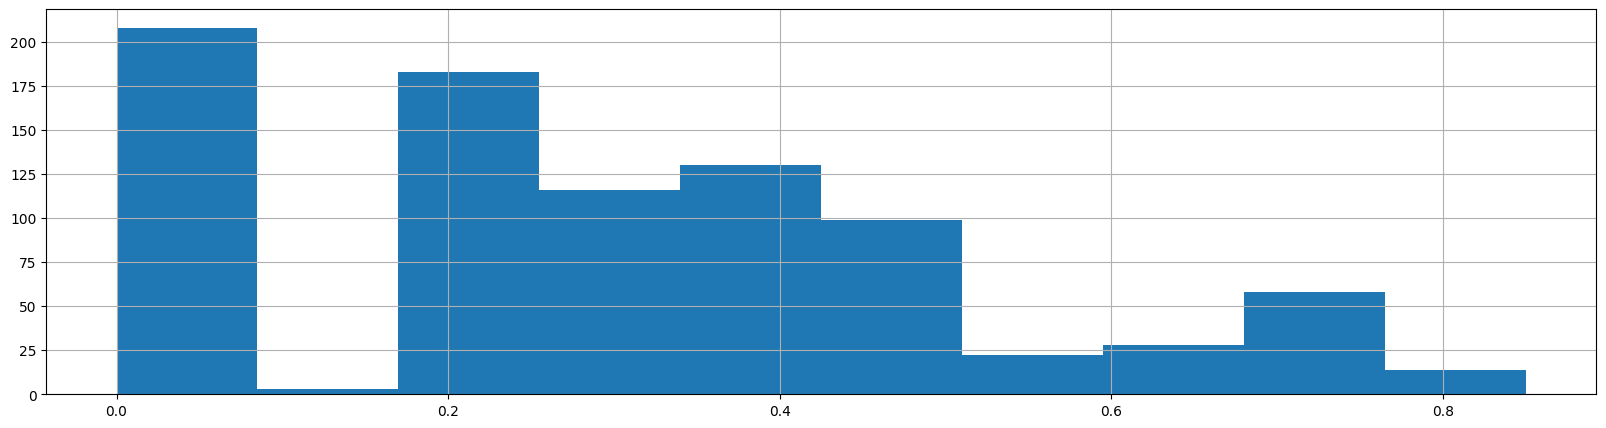

In [ ]:
fig = data_disc_acc.Discount.hist(figsize = (20,5))

In [7]:
add_data_di = data_disc_acc.groupby(['Order Date'])
add_data_di = add_data_di.mean().round(2).reset_index()

In [8]:
add_data_di['Order Date'].max()

'2014-12-31'

In [ ]:
add_data_di['Order Date'].min()

'2011-01-03'

In [9]:
ddates = pd.date_range(start='2011-01-03', end='2014-12-31', freq='D')
ddates = pd.DataFrame(ddates)
ddates = ddates.rename(columns = {0:'Order Date'})
add_data_di["Order Date"]=pd.to_datetime(add_data_di["Order Date"])
ddates= pd.merge(ddates, add_data_di, on = 'Order Date', how="left")
ddates = ddates.fillna(0)
ddates.set_index('Order Date', inplace=True)
ddatesm = ddates.resample('M').mean()

Metric for evaluation

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
# root mean squared error or rmse
def measure_rmse(actual, predicted):
 return sqrt(mean_squared_error(actual, predicted))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
seeds = [1, 42, 140, 600, 1234]

Libriaries

In [11]:
import itertools as it
import statsmodels.api as sm
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA

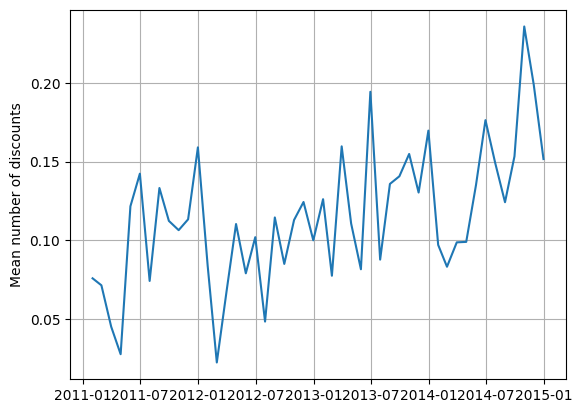

In [ ]:
import matplotlib.pylab as plt
plt.plot(ddatesm)
plt.ylabel('Mean number of discounts')
plt.grid()
plt.show()

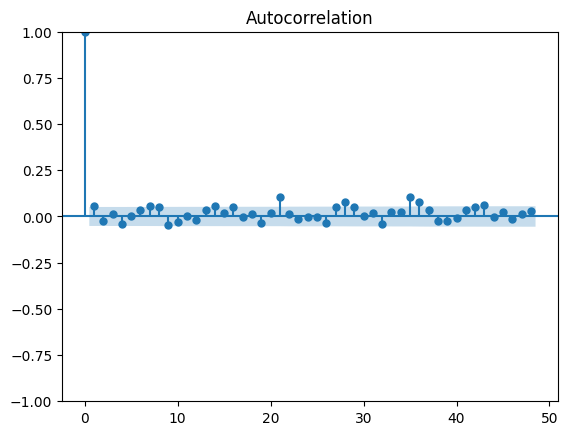

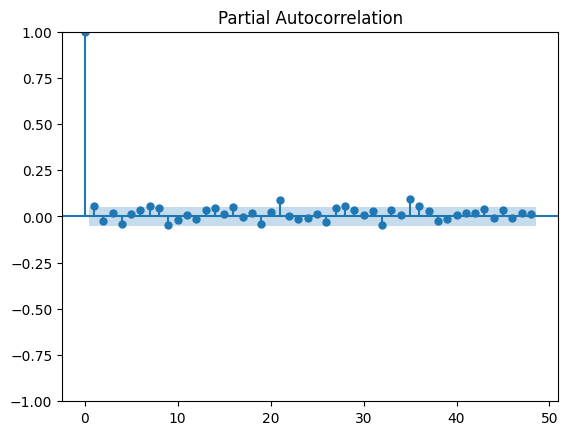

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ddates, lags =48)
plot_pacf(ddates, lags =48)
plt.show()

SARIMA

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(ddatesm, seasonal=True, trace=True) # Здесь sales_data - ваш временной ряд
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-202.096, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-176.424, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-185.940, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-178.375, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-202.847, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-205.840, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-201.502, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-201.255, Time=0.16 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.240 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:     

In [ ]:
train_len = 37
train = ddatesm[0:train_len]
test = ddatesm[train_len:]

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-90.34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9529      0.962     -0.990      0.322      -2.839       0.933
ma.L2         -0.0157      0.245     -0.064      0.949      -0.496       0.465
ma.S.L3       -0.9180      0.337     -2.723      0.006      -1.579      -0.257
ma.S.L6        0.1662      0.212      0.783      0.434      -0.250       0.583
sigma2         0.0008      0.001      1.324      0.185      -0.000       0.002


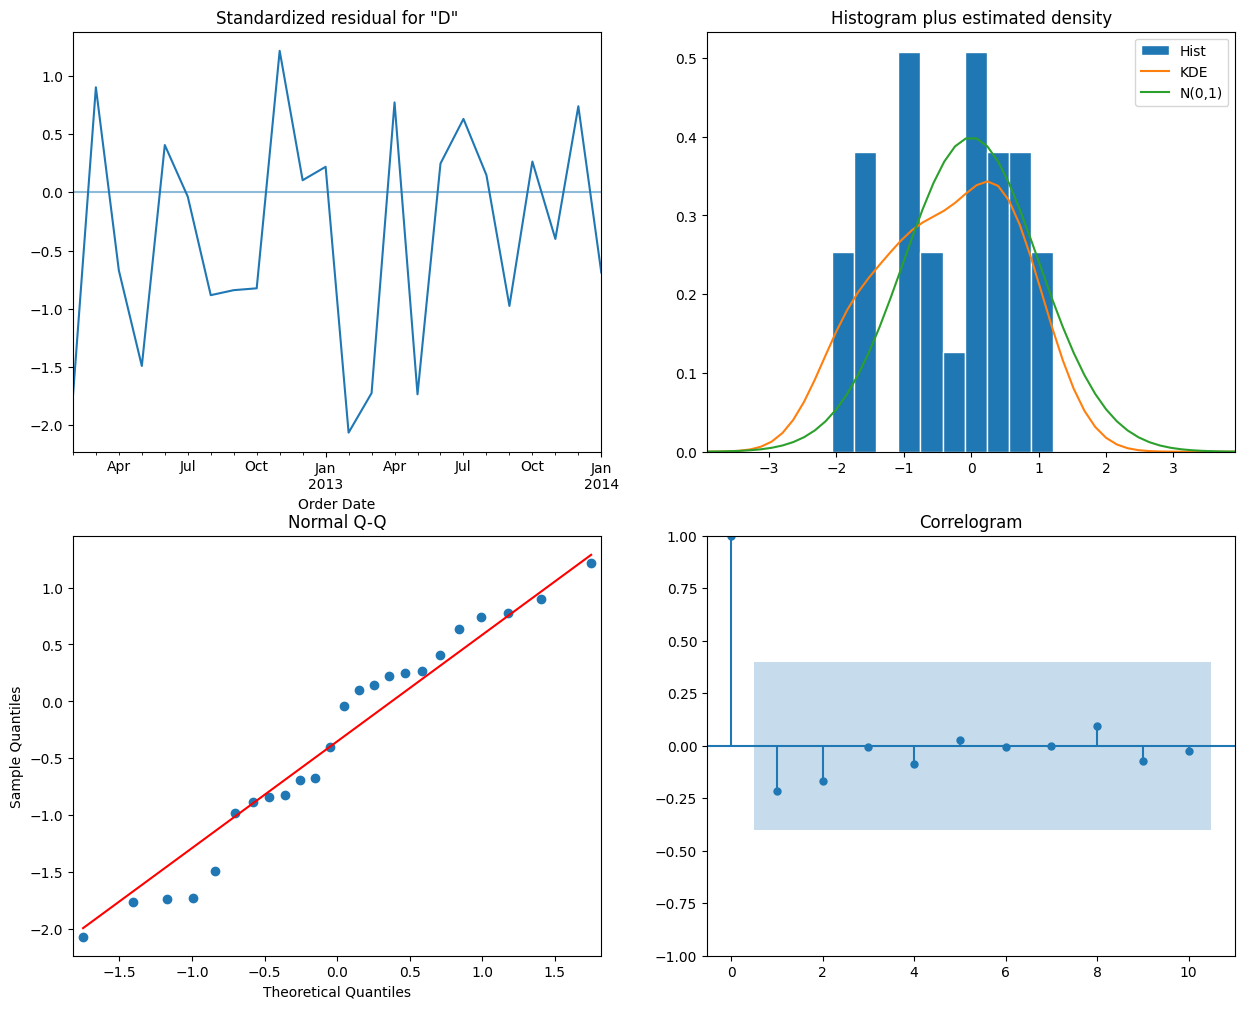

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 2, 3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print(round(results.aic,2))
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<Axes: xlabel='Order Date'>

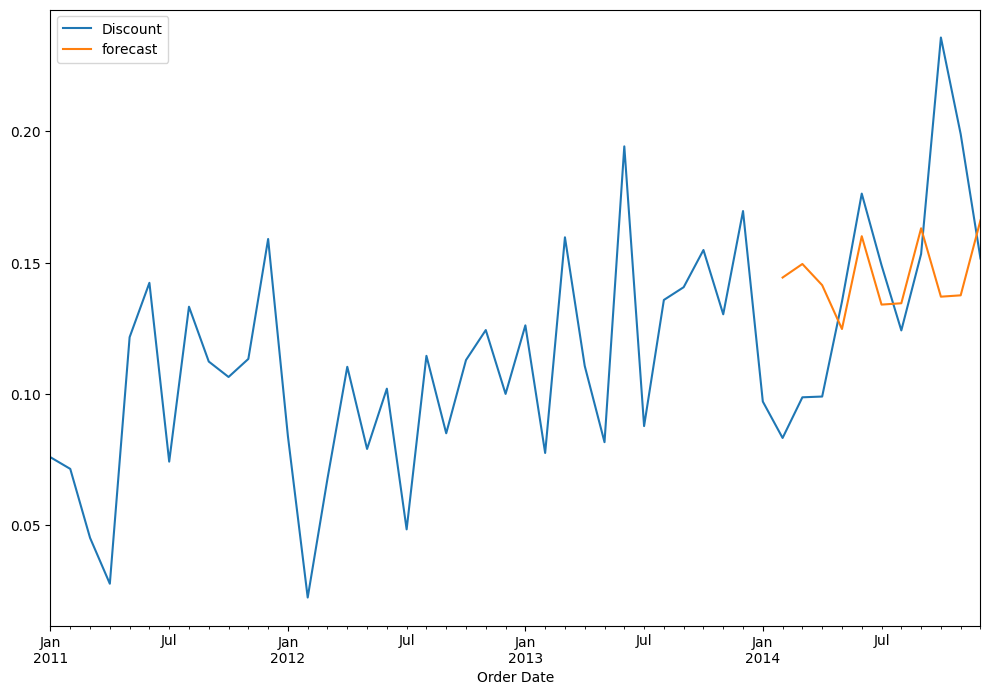

In [15]:
ddatesm['forecast']=results.predict(start=37,end=47,dynamic=True)
ddatesm[['Discount','forecast']].plot(figsize=(12,8))

In [ ]:
measure_rmse(ddatesm.Discount[37:], ddatesm.forecast[37:])

0.024196826637450933

In [ ]:
mean_absolute_percentage_error(ddatesm.Discount[37:], ddatesm.forecast[37:])

15.827666316080515

For seeds

In [16]:
ddatesm.drop('forecast', axis = 1, inplace = True)

In [17]:
SARIMA = dict()
for s in seeds:
  d1 = ddatesm.copy(deep=True)
  train_len = 37
  train = d1[0:train_len]
  test = d1[train_len:]
  np.random.seed(s)
  mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 2, 3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
  results = mod.fit()
  d1['forecast']=results.predict(start=37,end=47,dynamic=True)
  x = measure_rmse(d1.Discount[37:], d1.forecast[37:])
  y = mean_absolute_percentage_error(d1.Discount[37:], d1.forecast[37:])
  z = mean_squared_error(d1.Discount[37:], d1.forecast[37:])
  k = mean_absolute_error(d1.Discount[37:], d1.forecast[37:])
  SARIMA.update({s:[x,y]})
  print(s, x, y,z ,k)

1 0.04538346595067107 26.5292611023074 0.00205965898169572 0.035534078505181955
42 0.04538346595067107 26.5292611023074 0.00205965898169572 0.035534078505181955
140 0.04538346595067107 26.5292611023074 0.00205965898169572 0.035534078505181955
600 0.04538346595067107 26.5292611023074 0.00205965898169572 0.035534078505181955
1234 0.04538346595067107 26.5292611023074 0.00205965898169572 0.035534078505181955


Prophet

In [19]:
d2 = ddatesm
d2 = d2.reset_index()

In [20]:
d2.rename(columns={'Order Date': 'ds', 'Discount': 'y'}, inplace=True)  # Переименование столбцов для Prophet
train_len = 37
train = d2[0:train_len]
test = d2[train_len:]
# Создание и обучение модели
model3 = Prophet()
model3.fit(train)

# Создание будущего фрейма данных для прогноза
future = model3.make_future_dataframe(periods=11, freq='M')  # Здесь 12 - количество шагов вперед, freq='M' - месячная частота

# Генерация прогноза
forecast = model3.predict(future)

# Вывод результатов прогноза
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hbsqvmf/jihrgcn0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hbsqvmf/4ews38jg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33977', 'data', 'file=/tmp/tmp2hbsqvmf/jihrgcn0.json', 'init=/tmp/tmp2hbsqvmf/4ews38jg.json', 'output', 'file=/tmp/tmp2hbsqvmf/prophet_modeln7n2xgjq/prophet_model-20240524172450.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:24:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds      yhat  yhat_lower  yhat_upper
37 2014-02-28  0.097808    0.075622    0.118852
38 2014-03-31  0.113055    0.087639    0.136337
39 2014-04-30  0.093408    0.070641    0.119395
40 2014-05-31  0.132573    0.107622    0.156461
41 2014-06-30  0.178513    0.154612    0.201920
42 2014-07-31  0.099970    0.075994    0.123438
43 2014-08-31  0.155665    0.131731    0.178674
44 2014-09-30  0.140695    0.117318    0.166328
45 2014-10-31  0.146098    0.123629    0.171541
46 2014-11-30  0.145987    0.120985    0.169715
47 2014-12-31  0.182136    0.156610    0.205811


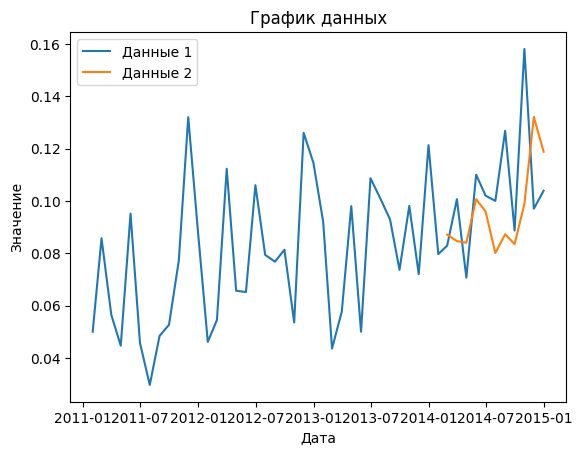

In [ ]:

# Создание графика
plt.plot(d2['ds'], d2['y'], label='Данные 1')
plt.plot(forecast['ds'].tail(11), forecast['yhat'].tail(11), label='Данные 2')

# Настройка графика
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График данных')
plt.legend()

# Отображение графика
plt.show()

In [ ]:
mean_absolute_percentage_error(d2.y[37:], forecast.yhat[37:])

18.124645647873567

In [ ]:
measure_rmse(d2.y[37:], forecast.yhat[37:])

0.026164308103841346

For seeds

In [21]:
prophet = dict()
for s in seeds:
  np.random.seed(s)
  d2 = ddatesm.copy(deep=True)
  d2 = d2.reset_index()
  d2.rename(columns={'Order Date': 'ds', 'Discount': 'y'}, inplace=True)  # Переименование столбцов для Prophet
  train_len = 37
  train = d2[0:train_len]
  test = d2[train_len:]
  # Создание и обучение модели
  model3 = Prophet()
  model3.fit(train)

  # Создание будущего фрейма данных для прогноза
  future = model3.make_future_dataframe(periods=11, freq='M')  # Здесь 12 - количество шагов вперед, freq='M' - месячная частота

  # Генерация прогноза
  forecast = model3.predict(future)
  y = mean_absolute_percentage_error(d2.y[37:], forecast.yhat[37:])
  x = measure_rmse(d2.y[37:], forecast.yhat[37:])
  z = mean_squared_error(d2.y[37:], forecast.yhat[37:])
  k = mean_absolute_error(d2.y[37:], forecast.yhat[37:])
  prophet.update({s:[x,y]})
  print(s, x, y,z,k)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hbsqvmf/_iavfj_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hbsqvmf/owtlv06h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86550', 'data', 'file=/tmp/tmp2hbsqvmf/_iavfj_7.json', 'init=/tmp/tmp2hbsqvmf/owtlv06h.json', 'output', 'file=/tmp/tmp2hbsqvmf/prophet_modelly1obc5q/prophet_model-20240524172504.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:25:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:25:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

1 0.03790950628034224 17.471796801616016 0.0014371306664193075 0.02779242042032034


17:25:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hbsqvmf/dbs89vbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hbsqvmf/8utjafzf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20305', 'data', 'file=/tmp/tmp2hbsqvmf/dbs89vbl.json', 'init=/tmp/tmp2hbsqvmf/8utjafzf.json', 'output', 'file=/tmp/tmp2hbsqvmf/prophet_modeldpo0spri/prophet_model-20240524172506.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:25:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


42 0.03790950628034224 17.471796801616016 0.0014371306664193075 0.02779242042032034


17:25:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hbsqvmf/y41pcsoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hbsqvmf/5i7rphzv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27260', 'data', 'file=/tmp/tmp2hbsqvmf/y41pcsoa.json', 'init=/tmp/tmp2hbsqvmf/5i7rphzv.json', 'output', 'file=/tmp/tmp2hbsqvmf/prophet_modelcm4glupl/prophet_model-20240524172506.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:25:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


140 0.03790950628034224 17.471796801616016 0.0014371306664193075 0.02779242042032034


17:25:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hbsqvmf/uxcdwv2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2hbsqvmf/bayydsws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59769', 'data', 'file=/tmp/tmp2hbsqvmf/uxcdwv2v.json', 'init=/tmp/tmp2hbsqvmf/bayydsws.json', 'output', 'file=/tmp/tmp2hbsqvmf/prophet_modeloqdxpqr3/prophet_model-20240524172507.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:25:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


600 0.03790950628034224 17.471796801616016 0.0014371306664193075 0.02779242042032034


17:25:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


1234 0.03790950628034224 17.471796801616016 0.0014371306664193075 0.02779242042032034


LSTM

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data


In [24]:

timeseries = ddatesm[['Discount']].values.astype('float32')

# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

lookback = 4
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

<ipython-input-24-1b89deae34ea>:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  return torch.tensor(X), torch.tensor(y)


<ipython-input-55-0582a6e2f1be>:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  return torch.tensor(X), torch.tensor(y)


Epoch 0: train RMSE 0.1278, test RMSE 0.1504
Epoch 100: train RMSE 0.0274, test RMSE 0.0320
Epoch 200: train RMSE 0.0272, test RMSE 0.0320
Epoch 300: train RMSE 0.0271, test RMSE 0.0335
Epoch 400: train RMSE 0.0269, test RMSE 0.0345
Epoch 500: train RMSE 0.0269, test RMSE 0.0356
Epoch 600: train RMSE 0.0268, test RMSE 0.0362
Epoch 700: train RMSE 0.0268, test RMSE 0.0355
Epoch 800: train RMSE 0.0269, test RMSE 0.0334
Epoch 900: train RMSE 0.0268, test RMSE 0.0341


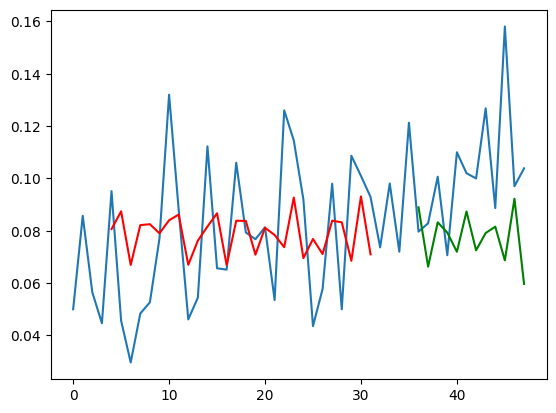

In [ ]:


model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()

In [ ]:
pred = []
for i in test_plot:
  if i[0] > 0:
    pred.append(i[0])
real = []
for i in timeseries[-12:]:
  real.append(i[0])

In [ ]:
measure_rmse(pred, real)

0.03586467440150926

In [ ]:
mean_absolute_percentage_error(pred, real)

37.739527225494385

For seeds

In [26]:
LSTM = dict()
for s in seeds:
  np.random.seed(s)
  timeseries = ddatesm[['Discount']].values.astype('float32')

  # train-test split for time series
  train_size = int(len(timeseries) * 0.67)
  test_size = len(timeseries) - train_size
  train, test = timeseries[:train_size], timeseries[train_size:]


  lookback = 4
  X_train, y_train = create_dataset(train, lookback=lookback)
  X_test, y_test = create_dataset(test, lookback=lookback)

  model = AirModel()
  optimizer = optim.Adam(model.parameters())
  loss_fn = nn.MSELoss()
  loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

  n_epochs = 1000
  for epoch in range(n_epochs):
      model.train()
      for X_batch, y_batch in loader:
          y_pred = model(X_batch)
          loss = loss_fn(y_pred, y_batch)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
      # Validation
      if epoch % 100 != 0:
          continue
      model.eval()
      with torch.no_grad():
          y_pred = model(X_train)
          train_rmse = np.sqrt(loss_fn(y_pred, y_train))
          y_pred = model(X_test)
          test_rmse = np.sqrt(loss_fn(y_pred, y_test))
      #print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

  with torch.no_grad():
      # shift train predictions for plotting
      train_plot = np.ones_like(timeseries) * np.nan
      y_pred = model(X_train)
      y_pred = y_pred[:, -1, :]
      train_plot[lookback:train_size] = model(X_train)[:, -1, :]
      # shift test predictions for plotting
      test_plot = np.ones_like(timeseries) * np.nan
      test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
  pred = []
  for i in test_plot:
    if i[0] > 0:
      pred.append(i[0])
  real = []
  for i in timeseries[-12:]:
    real.append(i[0])
  x = measure_rmse(pred, real)
  y = mean_absolute_percentage_error(pred, real)
  z = mean_squared_error(real, pred)
  k = mean_absolute_error(real, pred)
  LSTM.update({s:[x,y]})
  print(s,x,y,z,k)

1 0.05508195444416459 39.875149726867676 0.0030340217 0.043391913
42 0.05579842905635374 40.31670391559601 0.0031134647 0.043332625
140 0.05443642020372706 38.89291286468506 0.0029633238 0.042694937
600 0.05479759178870288 39.459529519081116 0.003002776 0.043118555
1234 0.056968424842296785 41.64409637451172 0.0032454014 0.044056818


XGBoost

In [27]:
ddatesm['Год'] = ddatesm.index.year
ddatesm['Месяц'] = ddatesm.index.month
ddatesm['День'] = ddatesm.index.day
ddatesm['День_недели'] = ddatesm.index.weekday

In [28]:
sales_data = ddatesm['Discount']

In [ ]:
train_data = ddatesm.loc[ddatesm.index < '2014-02-01']
test_data = ddatesm.loc[ddatesm.index >= '2014-02-01']
train_target = sales_data.loc[sales_data.index < '2014-02-01']
test_target = sales_data.loc[sales_data.index >= '2014-02-01']

In [ ]:
model = XGBRegressor()
model.fit(train_data.drop('Discount', axis=1), train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

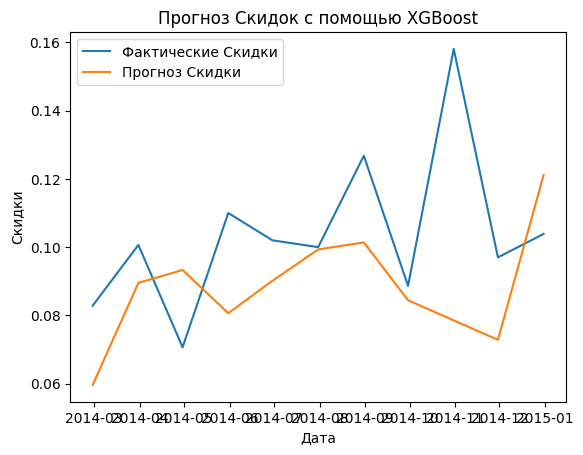

In [ ]:
predictions = model.predict(test_data.drop('Discount', axis=1))

# Визуализация прогноза
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [ ]:
mean_absolute_percentage_error(test_target, predictions)

20.608930237334697

In [ ]:
measure_rmse(test_target, predictions)

0.03022044931524084

For seeds

In [30]:
XGB = dict()
for s in seeds:
  np.random.seed(s)
  d3 = ddatesm.copy(deep=True)
  d3['Год'] = d3.index.year
  d3['Месяц'] = d3.index.month
  d3['День'] = d3.index.day
  d3['День_недели'] = d3.index.weekday
  sales_data = d3['Discount']
  train_data = d3.loc[d3.index < '2014-02-01']
  test_data = d3.loc[d3.index >= '2014-02-01']
  train_target = sales_data.loc[sales_data.index < '2014-02-01']
  test_target = sales_data.loc[sales_data.index >= '2014-02-01']
  model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
  model.fit(train_data.drop('Discount', axis=1), train_target)
  predictions = model.predict(test_data.drop('Discount', axis=1))
  y = mean_absolute_percentage_error(test_target, predictions)
  x = measure_rmse(test_target, predictions)
  z = mean_squared_error(test_target, predictions)
  k = mean_absolute_error(test_target, predictions)
  XGB.update({s:[x,y]})
  print(s,x,y,z,k)

1 0.04324333373834599 22.0356237496282 0.0018699859128059723 0.03380459406767589
42 0.04324333373834599 22.0356237496282 0.0018699859128059723 0.03380459406767589
140 0.04324333373834599 22.0356237496282 0.0018699859128059723 0.03380459406767589
600 0.04324333373834599 22.0356237496282 0.0018699859128059723 0.03380459406767589
1234 0.04324333373834599 22.0356237496282 0.0018699859128059723 0.03380459406767589


In [ ]:
SARIMA

{1: [0.024196826637450933, 15.827666316080515],
 42: [0.024196826637450933, 15.827666316080515],
 140: [0.024196826637450933, 15.827666316080515],
 600: [0.024196826637450933, 15.827666316080515],
 1234: [0.024196826637450933, 15.827666316080515]}

In [ ]:
prophet

{1: [0.026164308103841346, 18.124645647873567],
 42: [0.026164308103841346, 18.124645647873567],
 140: [0.026164308103841346, 18.124645647873567],
 600: [0.026164308103841346, 18.124645647873567],
 1234: [0.026164308103841346, 18.124645647873567]}

In [ ]:
LSTM

{1: [0.0372738065650361, 40.854015946388245],
 42: [0.03562205566245735, 37.28221654891968],
 140: [0.03817659372425157, 42.8319126367569],
 600: [0.0375877667710208, 41.57074689865112],
 1234: [0.03582381044456076, 37.69066333770752]}

In [ ]:
XGB

{1: [0.03022044931524084, 20.608930237334697],
 42: [0.03022044931524084, 20.608930237334697],
 140: [0.03022044931524084, 20.608930237334697],
 600: [0.03022044931524084, 20.608930237334697],
 1234: [0.03022044931524084, 20.608930237334697]}

XGBoost без аггрегации по месяцам

In [ ]:
ddates['Год'] = ddates.index.year
ddates['Месяц'] = ddates.index.month
ddates['День'] = ddates.index.day
ddates['День_недели'] = ddates.index.weekday

In [ ]:
sales_data = ddates['Discount']

In [ ]:
train_data = ddates.loc[ddates.index < '2014-02-01']
test_data = ddates.loc[ddates.index >= '2014-02-01']
train_target = sales_data.loc[sales_data.index < '2014-02-01']
test_target = sales_data.loc[sales_data.index >= '2014-02-01']

In [ ]:
model = XGBRegressor()
model.fit(train_data.drop('Discount', axis=1), train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

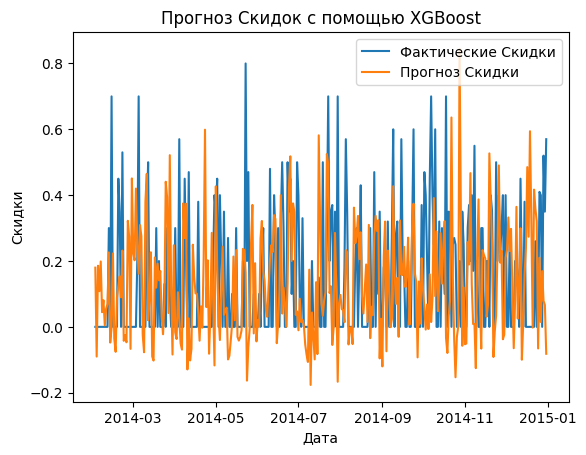

In [ ]:
predictions = model.predict(test_data.drop('Discount', axis=1))

# Визуализация прогноза
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [ ]:
predictions[predictions < 0] = 0

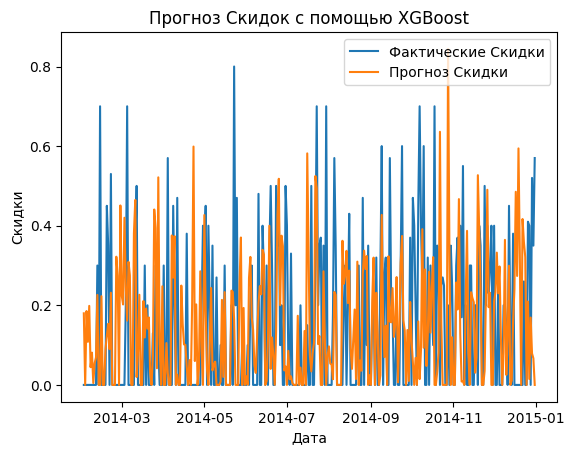

In [ ]:
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [ ]:
measure_rmse(test_target, predictions)

0.2342967855245524

# by Segments

In [31]:
#data_acc = data_arima.loc[data_arima['Sub-Category'] == 'Tables']
data_acc = data_arima.loc[data_arima['Segment'] == 'Corporate']

In [32]:
data_disc_acc = data_acc[['Order Date', 'Discount']].copy(deep=True)

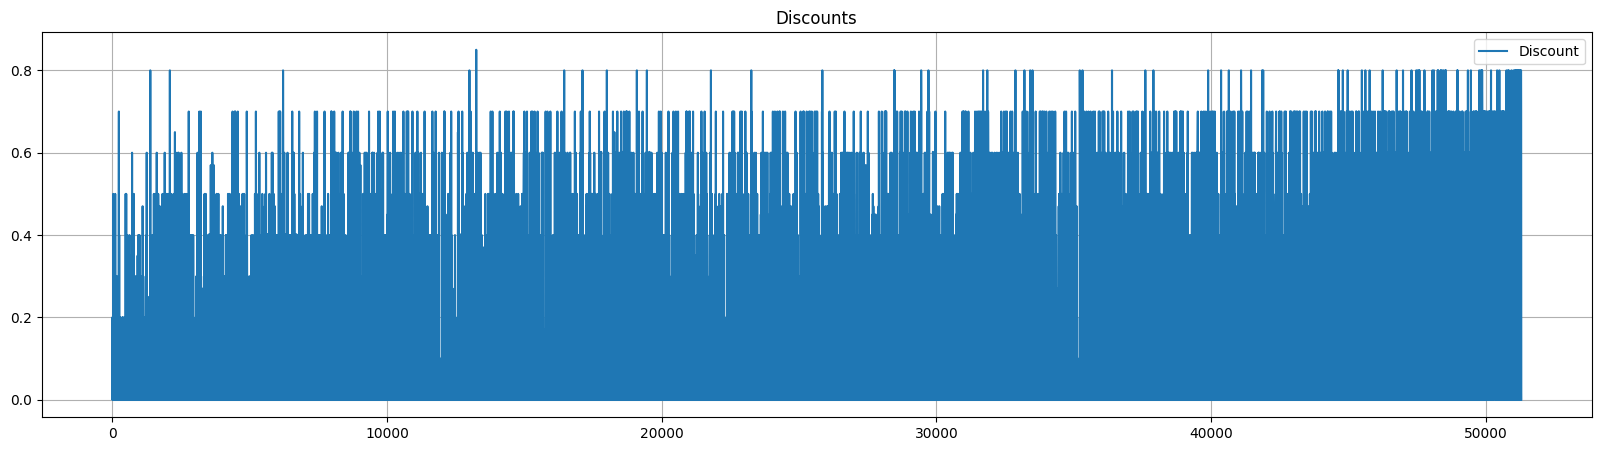

In [ ]:
data_disc_acc.plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.title('Discounts')
plt.show(block=False)

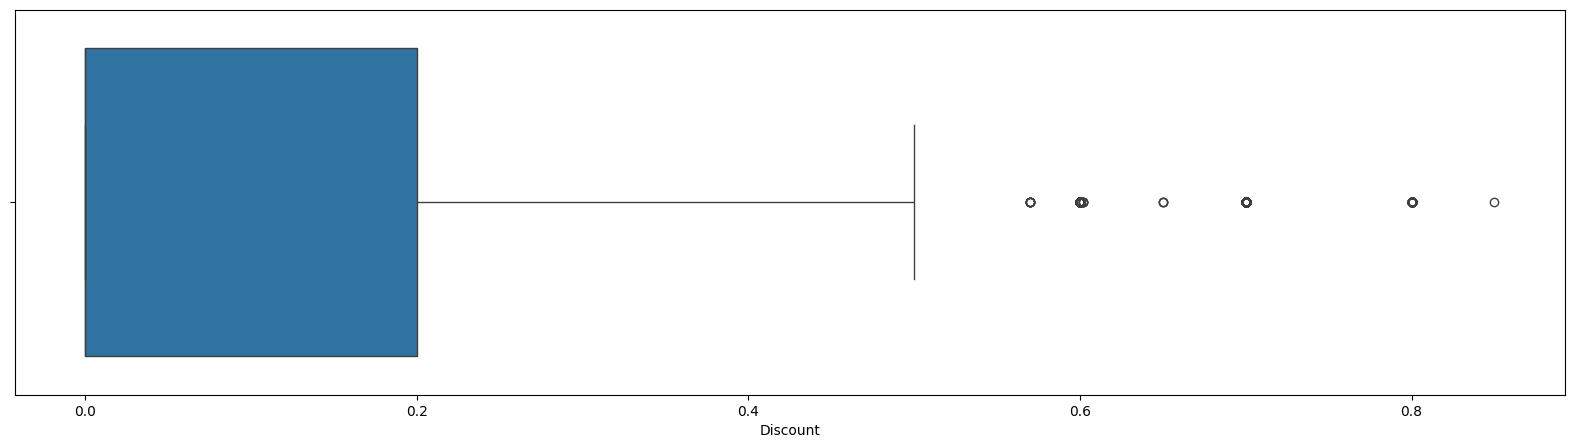

In [ ]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data_disc_acc['Discount'],whis=1.5)

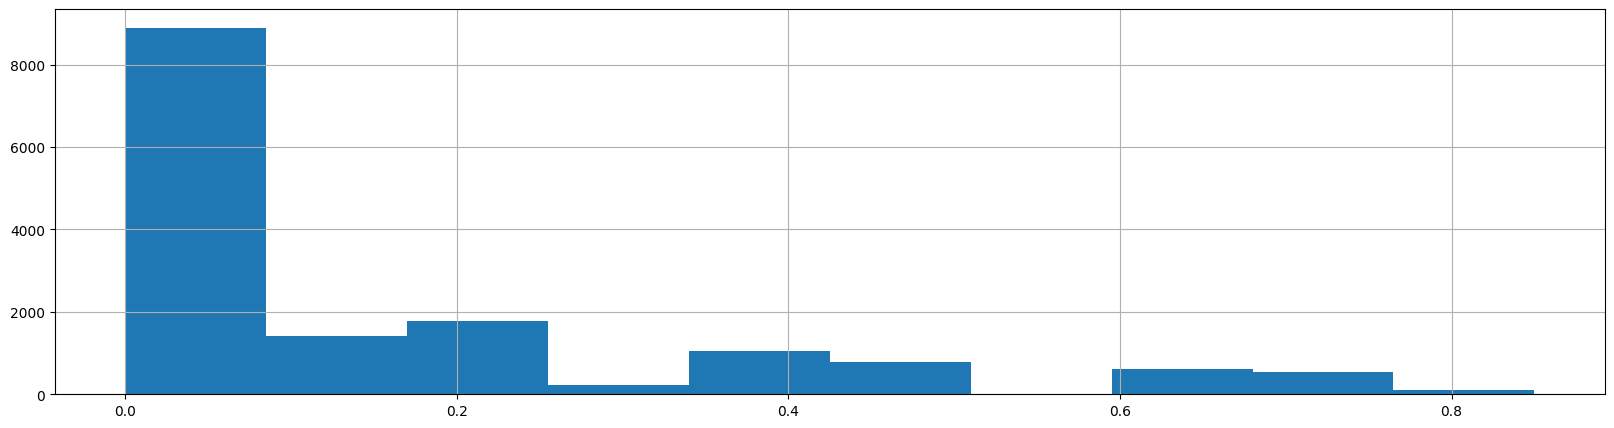

In [ ]:
fig = data_disc_acc.Discount.hist(figsize = (20,5))

In [33]:
add_data_di = data_disc_acc.groupby(['Order Date'])
add_data_di = add_data_di.mean().round(2).reset_index()

In [34]:
ddates = pd.date_range(start='2011-01-03', end='2014-12-31', freq='D')
ddates = pd.DataFrame(ddates)
ddates = ddates.rename(columns = {0:'Order Date'})
add_data_di["Order Date"]=pd.to_datetime(add_data_di["Order Date"])
ddates= pd.merge(ddates, add_data_di, on = 'Order Date', how="left")
ddates = ddates.fillna(0)
ddates.set_index('Order Date', inplace=True)
ddatesm = ddates.resample('M').mean()

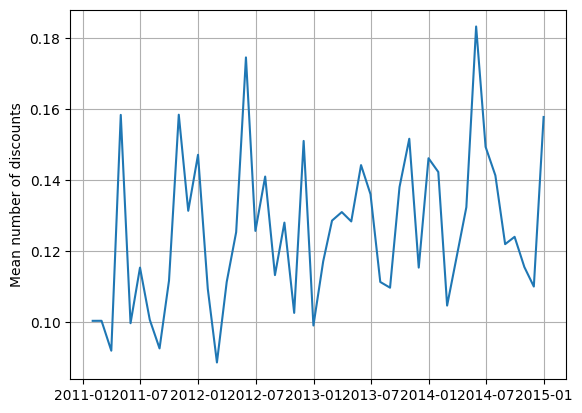

In [ ]:
import matplotlib.pylab as plt
plt.plot(ddatesm)
plt.ylabel('Mean number of discounts')
plt.grid()
plt.show()

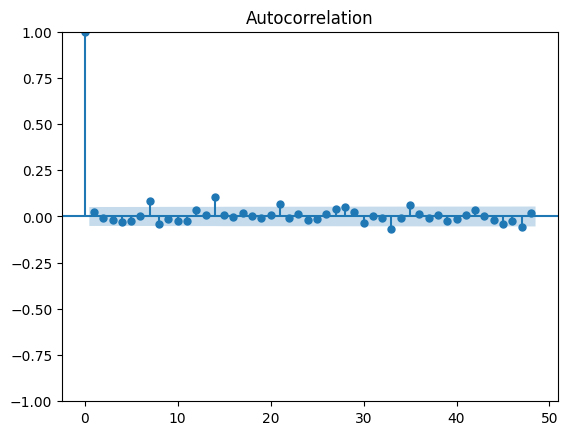

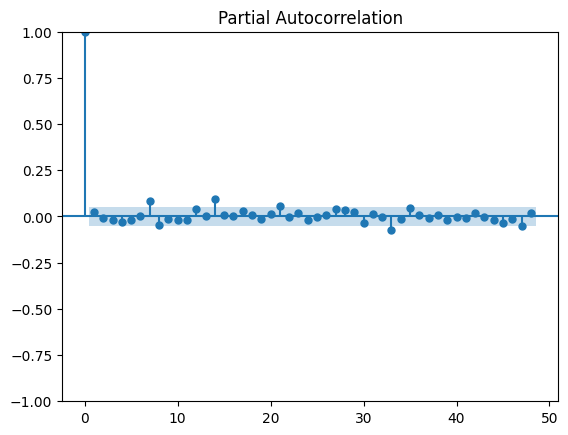

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ddates, lags =48)
plot_pacf(ddates, lags =48)
plt.show()

In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(ddatesm, seasonal=True, trace=True) # Здесь sales_data - ваш временной ряд
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-195.790, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-203.898, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-197.706, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-202.489, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-216.539, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-221.027, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-205.268, Time=0.10 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-220.063, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-206.635, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-219.002, Time=0

In [ ]:
train_len = 37
train = ddatesm[0:train_len]
test = ddatesm[train_len:]

-152.13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0741      0.185     -0.400      0.689      -0.437       0.289
ar.L2         -0.0434      0.173     -0.251      0.802      -0.382       0.295
ar.L3         -0.3555      0.251     -1.414      0.157      -0.848       0.137
ma.L1         -0.8743      0.182     -4.803      0.000      -1.231      -0.518
sigma2         0.0004      0.000      2.921      0.003       0.000       0.001


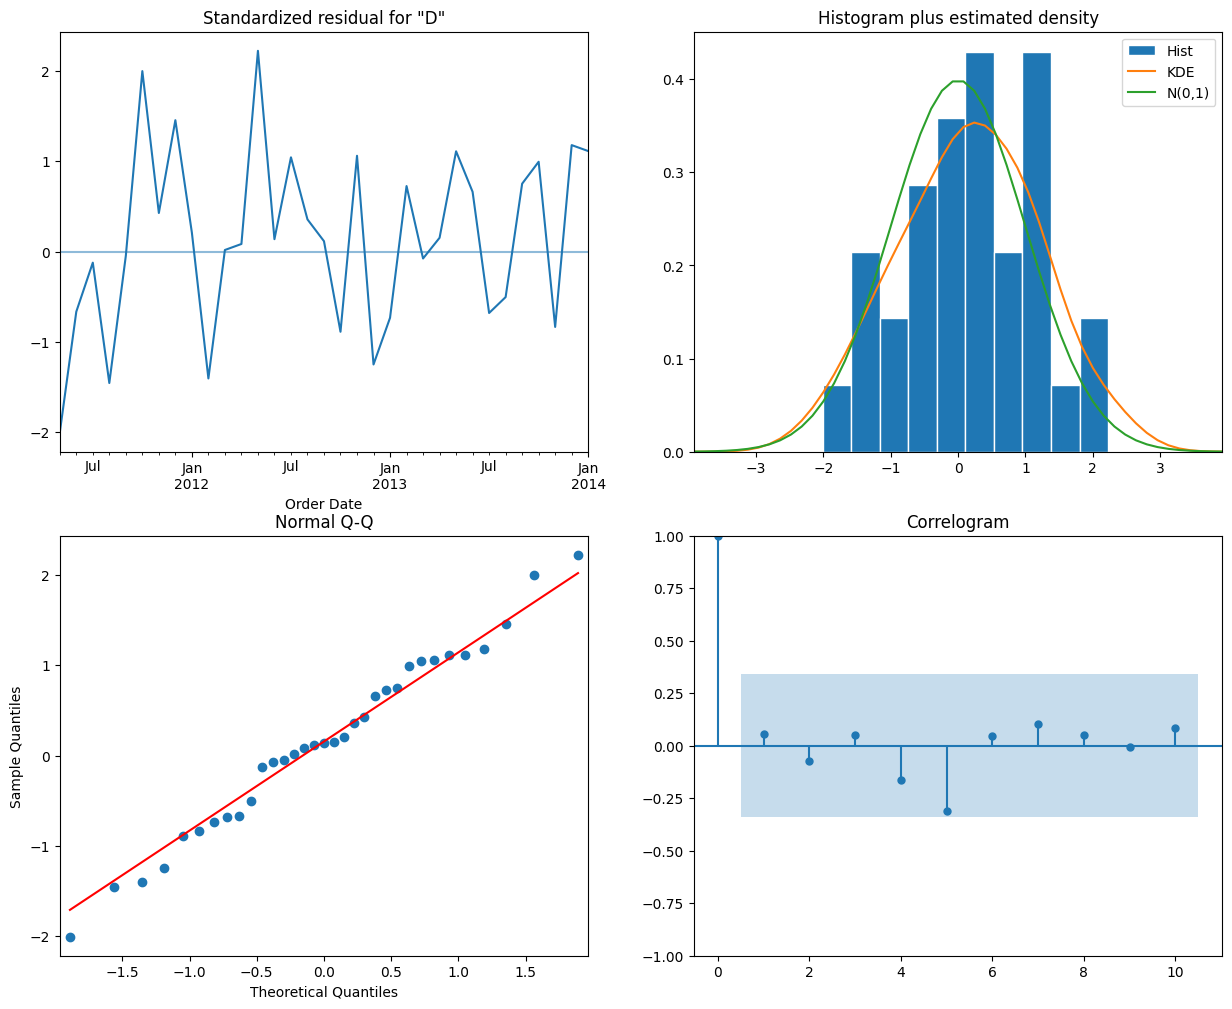

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(3, 1, 1),
                                seasonal_order=(0, 0, 0, 3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print(round(results.aic,2))
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<Axes: xlabel='Order Date'>

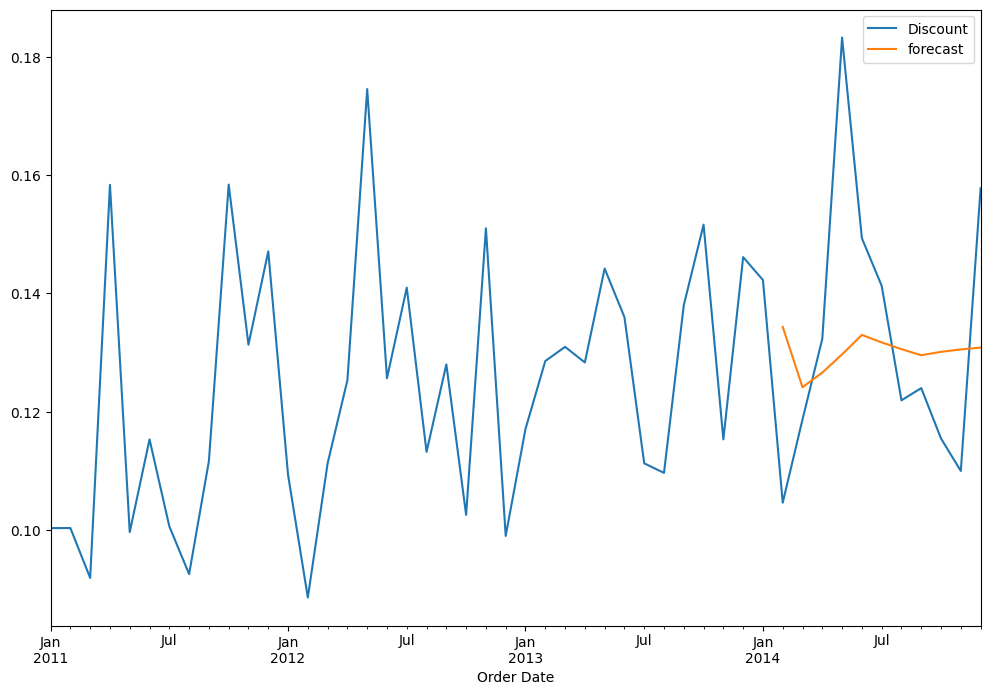

In [ ]:
ddatesm['forecast']=results.predict(start=37,end=47,dynamic=True)
ddatesm[['Discount','forecast']].plot(figsize=(12,8))

In [ ]:
mean_absolute_percentage_error(ddatesm.Discount[37:], ddatesm.forecast[37:])

13.106986408933793

In [ ]:
measure_rmse(ddatesm.Discount[37:], ddatesm.forecast[37:])

0.022630329174445574

In [ ]:
for s in seeds:
  d1 = ddatesm.copy(deep=True)
  train_len = 37
  train = d1[0:train_len]
  test = d1[train_len:]
  np.random.seed(s)
  mod = sm.tsa.statespace.SARIMAX(train,
                                order=(4, 1, 1),
                                seasonal_order=(0, 0, 0, 3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
  results = mod.fit()
  d1['forecast']=results.predict(start=37,end=47,dynamic=True)
  x = measure_rmse(d1.Discount[37:], d1.forecast[37:])
  y = mean_absolute_percentage_error(d1.Discount[37:], d1.forecast[37:])
  SARIMA.update({s:[x,y]})
  print(s, x, y)

1 0.022340631816827716 13.901159065105285
42 0.022340631816827716 13.901159065105285
140 0.022340631816827716 13.901159065105285
600 0.022340631816827716 13.901159065105285
1234 0.022340631816827716 13.901159065105285


Prophet

In [ ]:
ddatesm.drop('forecast', axis = 1, inplace = True)

In [ ]:
ddatesm = ddatesm.reset_index()

In [ ]:
ddatesm.rename(columns={'Order Date': 'ds', 'Discount': 'y'}, inplace=True)  # Переименование столбцов для Prophet
train_len = 37
train = ddatesm[0:train_len]
test = ddatesm[train_len:]
# Создание и обучение модели
model3 = Prophet()
model3.fit(train)

# Создание будущего фрейма данных для прогноза
future = model3.make_future_dataframe(periods=11, freq='M')  # Здесь 12 - количество шагов вперед, freq='M' - месячная частота

# Генерация прогноза
forecast = model3.predict(future)

# Вывод результатов прогноза
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl_bg06q0/_jzpiyu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl_bg06q0/1b2za6q9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75463', 'data', 'file=/tmp/tmpl_bg06q0/_jzpiyu1.json', 'init=/tmp/tmpl_bg06q0/1b2za6q9.json', 'output', 'file=/tmp/tmpl_bg06q0/prophet_modelt11pvc88/prophet_model-20240421174700.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:47:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds      yhat  yhat_lower  yhat_upper
37 2014-02-28  0.120156    0.105741    0.135747
38 2014-03-31  0.122378    0.107763    0.137732
39 2014-04-30  0.164391    0.150681    0.180270
40 2014-05-31  0.144128    0.129289    0.159546
41 2014-06-30  0.143740    0.129125    0.158607
42 2014-07-31  0.129347    0.114316    0.144404
43 2014-08-31  0.118351    0.104141    0.133842
44 2014-09-30  0.136799    0.120723    0.151557
45 2014-10-31  0.161322    0.146530    0.175027
46 2014-11-30  0.140851    0.126028    0.156053
47 2014-12-31  0.150900    0.136369    0.165709


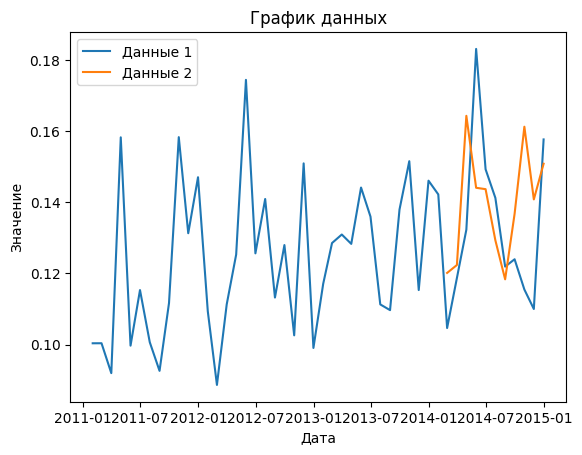

In [ ]:

# Создание графика
plt.plot(ddatesm['ds'], ddatesm['y'], label='Данные 1')
plt.plot(forecast['ds'].tail(11), forecast['yhat'].tail(11), label='Данные 2')

# Настройка графика
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График данных')
plt.legend()

# Отображение графика
plt.show()

In [ ]:
mean_absolute_percentage_error(ddatesm.y[37:], forecast.yhat[37:])

14.637699146521111

In [ ]:
measure_rmse(ddatesm.y[37:], forecast.yhat[37:])

0.02385700917860164

In [ ]:
prophet = dict()
for s in seeds:
  np.random.seed(s)
  d2 = ddatesm.copy(deep=True)
  d2 = d2.reset_index()
  d2.rename(columns={'Order Date': 'ds', 'Discount': 'y'}, inplace=True)  # Переименование столбцов для Prophet
  train_len = 37
  train = d2[0:train_len]
  test = d2[train_len:]
  # Создание и обучение модели
  model3 = Prophet()
  model3.fit(train)

  # Создание будущего фрейма данных для прогноза
  future = model3.make_future_dataframe(periods=11, freq='M')  # Здесь 12 - количество шагов вперед, freq='M' - месячная частота

  # Генерация прогноза
  forecast = model3.predict(future)
  y = mean_absolute_percentage_error(d2.y[37:], forecast.yhat[37:])
  x = measure_rmse(d2.y[37:], forecast.yhat[37:])
  prophet.update({s:[x,y]})
  print(s, x, y)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx796bju3/ejveg_u3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx796bju3/30jn4b8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31999', 'data', 'file=/tmp/tmpx796bju3/ejveg_u3.json', 'init=/tmp/tmpx796bju3/30jn4b8e.json', 'output', 'file=/tmp/tmpx796bju3/prophet_model8i42gmwu/prophet_model-20240515114831.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:48:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:48:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

1 0.02385700917860164 14.637699146521111


11:48:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx796bju3/6_k1j_ue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx796bju3/6tbk5wce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70313', 'data', 'file=/tmp/tmpx796bju3/6_k1j_ue.json', 'init=/tmp/tmpx796bju3/6tbk5wce.json', 'output', 'file=/tmp/tmpx796bju3/prophet_modelajiqj5y3/prophet_model-20240515114832.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:48:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


42 0.02385700917860164 14.637699146521111


11:48:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx796bju3/t3rk8yrh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx796bju3/fbx13g6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94733', 'data', 'file=/tmp/tmpx796bju3/t3rk8yrh.json', 'init=/tmp/tmpx796bju3/fbx13g6e.json', 'output', 'file=/tmp/tmpx796bju3/prophet_model8uzmv4xk/prophet_model-20240515114833.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:48:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


140 0.02385700917860164 14.637699146521111


11:48:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx796bju3/wq1kesvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx796bju3/mio8ad4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18467', 'data', 'file=/tmp/tmpx796bju3/wq1kesvf.json', 'init=/tmp/tmpx796bju3/mio8ad4f.json', 'output', 'file=/tmp/tmpx796bju3/prophet_modelxngx4jfr/prophet_model-20240515114833.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:48:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


600 0.02385700917860164 14.637699146521111


11:48:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


1234 0.02385700917860164 14.637699146521111


LSTM

<ipython-input-12-cc0b9dbd022f>:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  return torch.tensor(X), torch.tensor(y)


Epoch 0: train RMSE 0.0314, test RMSE 0.0389
Epoch 100: train RMSE 0.0215, test RMSE 0.0244
Epoch 200: train RMSE 0.0217, test RMSE 0.0253
Epoch 300: train RMSE 0.0215, test RMSE 0.0248
Epoch 400: train RMSE 0.0214, test RMSE 0.0227
Epoch 500: train RMSE 0.0213, test RMSE 0.0231
Epoch 600: train RMSE 0.0213, test RMSE 0.0242
Epoch 700: train RMSE 0.0219, test RMSE 0.0214
Epoch 800: train RMSE 0.0211, test RMSE 0.0227
Epoch 900: train RMSE 0.0211, test RMSE 0.0222


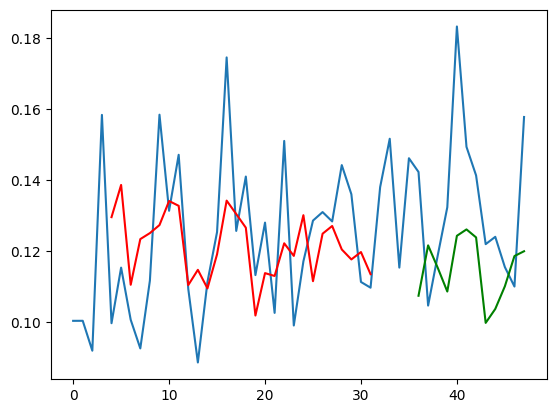

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
np.random.seed(1234)
timeseries = ddatesm[['Discount']].values.astype('float32')

# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

lookback = 4
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()

In [ ]:
pred = []
for i in test_plot:
  if i[0] > 0:
    pred.append(i[0])
real = []
for i in timeseries[-12:]:
  real.append(i[0])
x = measure_rmse(pred, real)
y = mean_absolute_percentage_error(pred, real)
print(x,y)

0.02712877632786981 19.719724357128143


In [ ]:
LSTM = dict()
for s in seeds:
  np.random.seed(s)
  timeseries = ddatesm[['Discount']].values.astype('float32')

  # train-test split for time series
  train_size = int(len(timeseries) * 0.67)
  test_size = len(timeseries) - train_size
  train, test = timeseries[:train_size], timeseries[train_size:]


  lookback = 4
  X_train, y_train = create_dataset(train, lookback=lookback)
  X_test, y_test = create_dataset(test, lookback=lookback)

  model = AirModel()
  optimizer = optim.Adam(model.parameters())
  loss_fn = nn.MSELoss()
  loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

  n_epochs = 1000
  for epoch in range(n_epochs):
      model.train()
      for X_batch, y_batch in loader:
          y_pred = model(X_batch)
          loss = loss_fn(y_pred, y_batch)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
      # Validation
      if epoch % 100 != 0:
          continue
      model.eval()
      with torch.no_grad():
          y_pred = model(X_train)
          train_rmse = np.sqrt(loss_fn(y_pred, y_train))
          y_pred = model(X_test)
          test_rmse = np.sqrt(loss_fn(y_pred, y_test))
      #print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

  with torch.no_grad():
      # shift train predictions for plotting
      train_plot = np.ones_like(timeseries) * np.nan
      y_pred = model(X_train)
      y_pred = y_pred[:, -1, :]
      train_plot[lookback:train_size] = model(X_train)[:, -1, :]
      # shift test predictions for plotting
      test_plot = np.ones_like(timeseries) * np.nan
      test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
  pred = []
  for i in test_plot:
    if i[0] > 0:
      pred.append(i[0])
  real = []
  for i in timeseries[-12:]:
    real.append(i[0])
  x = measure_rmse(pred, real)
  y = mean_absolute_percentage_error(pred, real)
  LSTM.update({s:[x,y]})
  print(s,x,y)

1 0.026885420179522335 18.662244081497192
42 0.023008676621590698 14.83059972524643
140 0.025091783044157556 16.313764452934265
600 0.025503860887912764 17.33977645635605
1234 0.025605160784451554 17.83410906791687


XGBoost

In [ ]:
ddatesm['Год'] = ddatesm.index.year
ddatesm['Месяц'] = ddatesm.index.month
ddatesm['День'] = ddatesm.index.day
ddatesm['День_недели'] = ddatesm.index.weekday

In [ ]:
sales_data = ddatesm['Discount']

In [ ]:
train_data = ddatesm.loc[ddatesm.index < '2014-02-01']
test_data = ddatesm.loc[ddatesm.index >= '2014-02-01']
train_target = sales_data.loc[sales_data.index < '2014-02-01']
test_target = sales_data.loc[sales_data.index >= '2014-02-01']

In [ ]:
model = XGBRegressor()
model.fit(train_data.drop('Discount', axis=1), train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

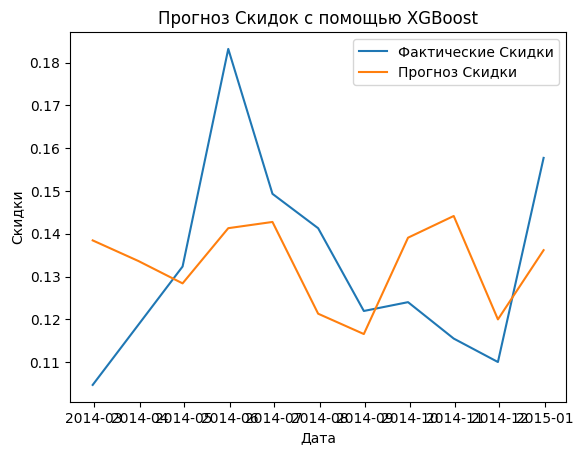

In [ ]:
predictions = model.predict(test_data.drop('Discount', axis=1))

# Визуализация прогноза
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [ ]:
mean_absolute_percentage_error(test_target, predictions)

13.947994975700873

In [ ]:
measure_rmse(test_target, predictions)

0.0217934472366668

In [ ]:
XGB = dict()
for s in seeds:
  np.random.seed(s)
  d3 = ddatesm.copy(deep=True)
  d3['Год'] = d3.index.year
  d3['Месяц'] = d3.index.month
  d3['День'] = d3.index.day
  d3['День_недели'] = d3.index.weekday
  sales_data = d3['Discount']
  train_data = d3.loc[d3.index < '2014-02-01']
  test_data = d3.loc[d3.index >= '2014-02-01']
  train_target = sales_data.loc[sales_data.index < '2014-02-01']
  test_target = sales_data.loc[sales_data.index >= '2014-02-01']
  model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
  model.fit(train_data.drop('Discount', axis=1), train_target)
  predictions = model.predict(test_data.drop('Discount', axis=1))
  y = mean_absolute_percentage_error(test_target, predictions)
  x = measure_rmse(test_target, predictions)
  XGB.update({s:[x,y]})
  print(s,x,y)

1 0.0217934472366668 13.947994975700873
42 0.0217934472366668 13.947994975700873
140 0.0217934472366668 13.947994975700873
600 0.0217934472366668 13.947994975700873
1234 0.0217934472366668 13.947994975700873


In [ ]:
ddates['Год'] = ddates.index.year
ddates['Месяц'] = ddates.index.month
ddates['День'] = ddates.index.day
ddates['День_недели'] = ddates.index.weekday

In [ ]:
sales_data = ddates['Discount']

In [ ]:
train_data = ddates.loc[ddates.index < '2014-02-01']
test_data = ddates.loc[ddates.index >= '2014-02-01']
train_target = sales_data.loc[sales_data.index < '2014-02-01']
test_target = sales_data.loc[sales_data.index >= '2014-02-01']

In [ ]:
model = XGBRegressor()
model.fit(train_data.drop('Discount', axis=1), train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

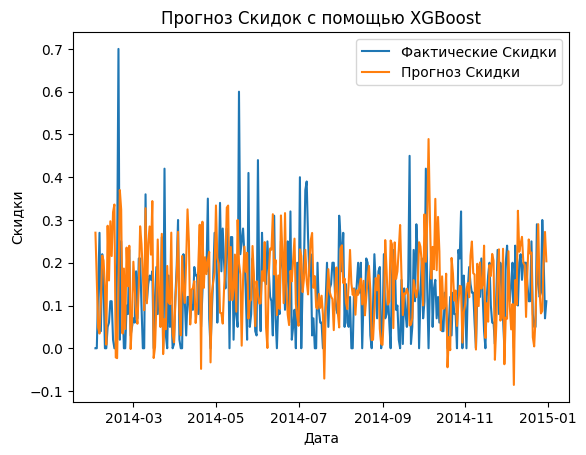

In [ ]:
predictions = model.predict(test_data.drop('Discount', axis=1))

# Визуализация прогноза
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [ ]:
predictions[predictions < 0] = 0

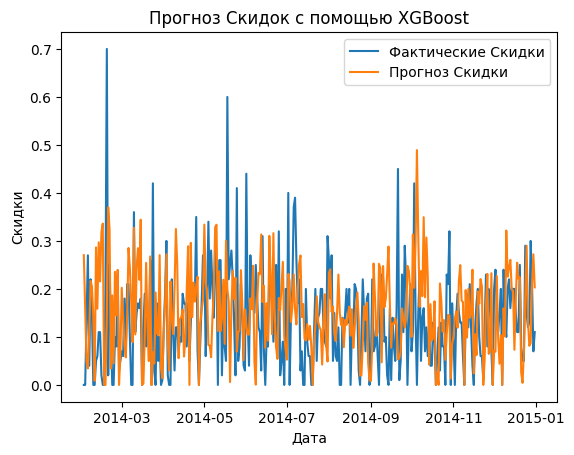

In [ ]:
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [ ]:
measure_rmse(test_target, predictions)

0.12839669495659048

# Experiments on data about Sales
I do not use these results in work, though I used these experiments to evaluate models on different data

In [ ]:
data_sales_acc = data_acc[['Order Date', 'Sales']].copy(deep=True)

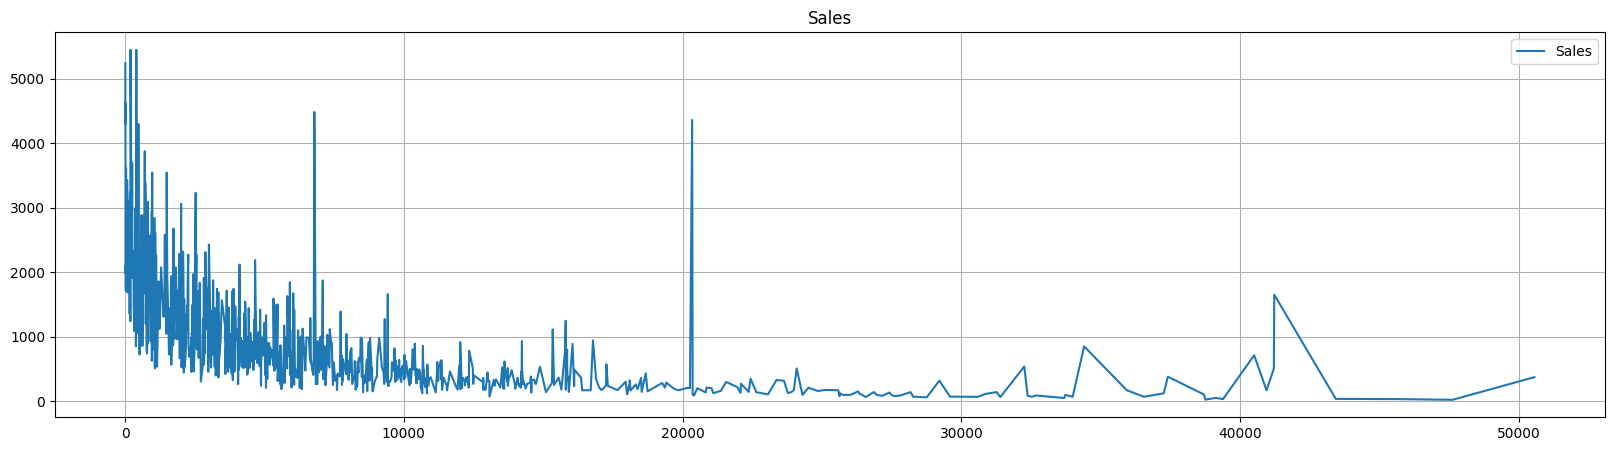

In [ ]:
data_sales_acc.plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=False)

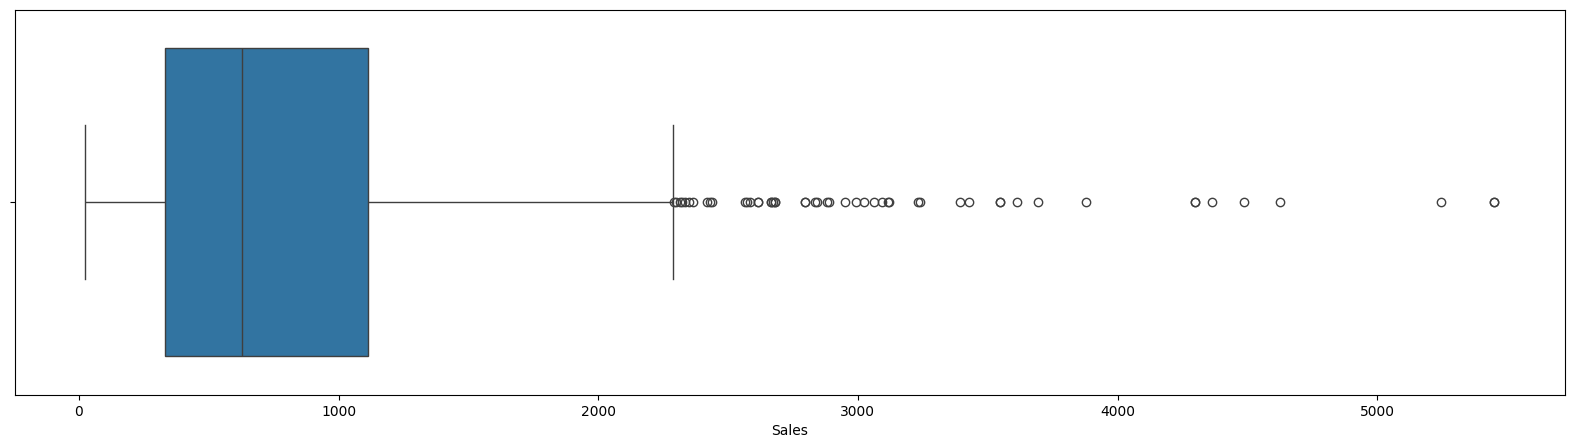

In [ ]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data_sales_acc['Sales'],whis=1.5)

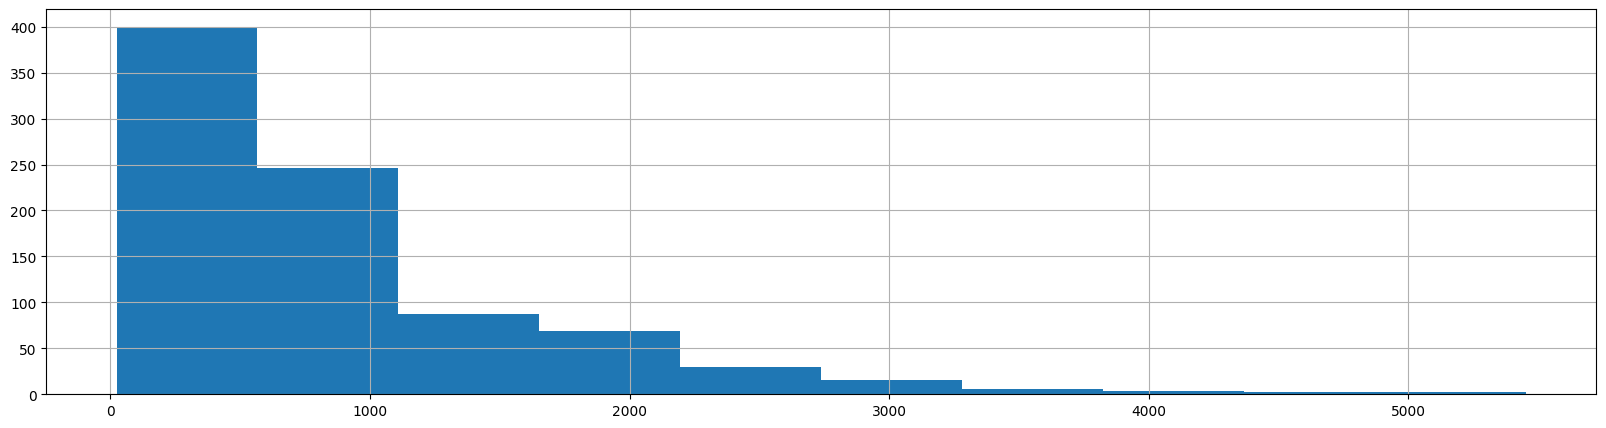

In [ ]:
fig = data_sales_acc.Sales.hist(figsize = (20,5))

In [ ]:
add_data_acc = data_sales_acc.groupby(['Order Date'])

In [ ]:
add_data_acc = add_data_acc.mean().round(2).reset_index()

In [ ]:
add_data_acc['Order Date'].max()

'2014-12-31'

In [ ]:
add_data_acc['Order Date'].min()

'2011-01-03'

In [ ]:
dates = pd.date_range(start='2011-01-03', end='2014-12-31', freq='D')
dates = pd.DataFrame(dates)
dates = dates.rename(columns = {0:'Order Date'})
add_data_acc["Order Date"]=pd.to_datetime(add_data_acc["Order Date"])
dates= pd.merge(dates, add_data_acc, on = 'Order Date', how="left")
dates = dates.fillna(0)
dates.set_index('Order Date', inplace=True)
datesm = dates.resample('M').mean()

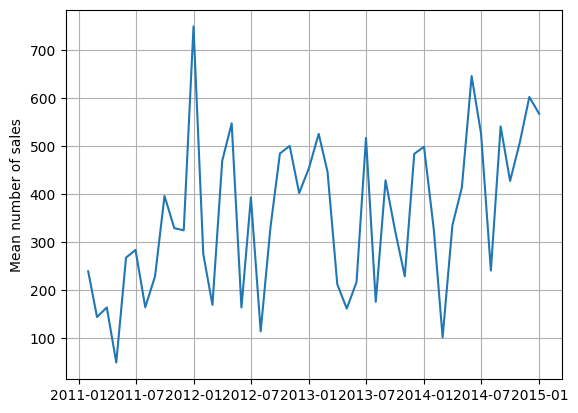

In [ ]:
import matplotlib.pylab as plt
plt.plot(datesm)
plt.ylabel('Mean number of sales')
plt.grid()
plt.show()

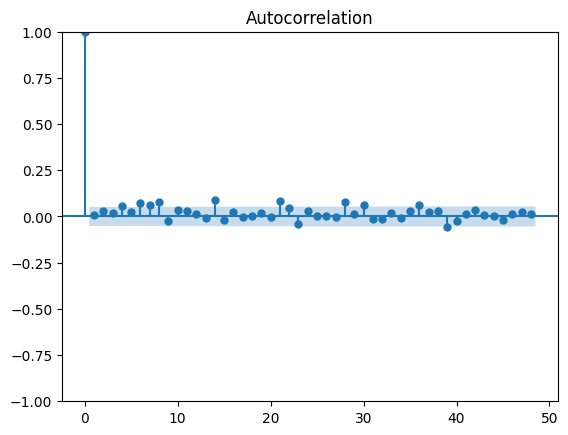

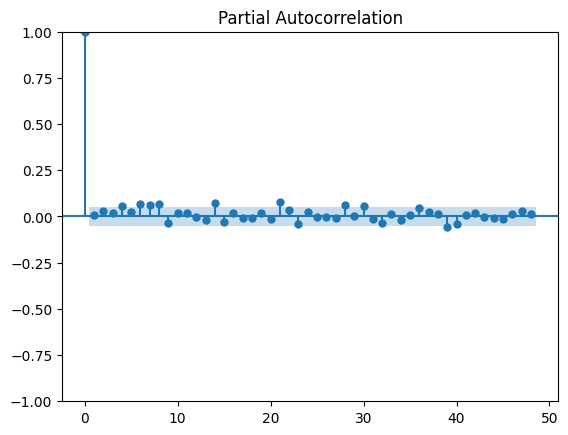

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dates, lags =48)
plot_pacf(dates, lags =48)
plt.show()

In [ ]:
import itertools as it
import statsmodels.api as sm

Аггрегировано по месяцам

SARIMA

In [ ]:
datesm

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(datesm, seasonal=True, trace=True) # Здесь sales_data - ваш временной ряд
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=634.180, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=628.955, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=632.239, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=622.302, Time=1.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=621.342, Time=1.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=621.456, Time=0.79 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=620.026, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=620.702, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=620.449, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=618.830, Time=0.33 sec
 A

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train_len = 37
train = datesm[0:train_len]
test = datesm[train_len:]

374.8
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2964      0.333     -3.891      0.000      -1.949      -0.643
ma.S.L3       -1.0002    241.409     -0.004      0.997    -474.153     472.153
sigma2      1.494e+04   3.61e+06      0.004      0.997   -7.07e+06     7.1e+06


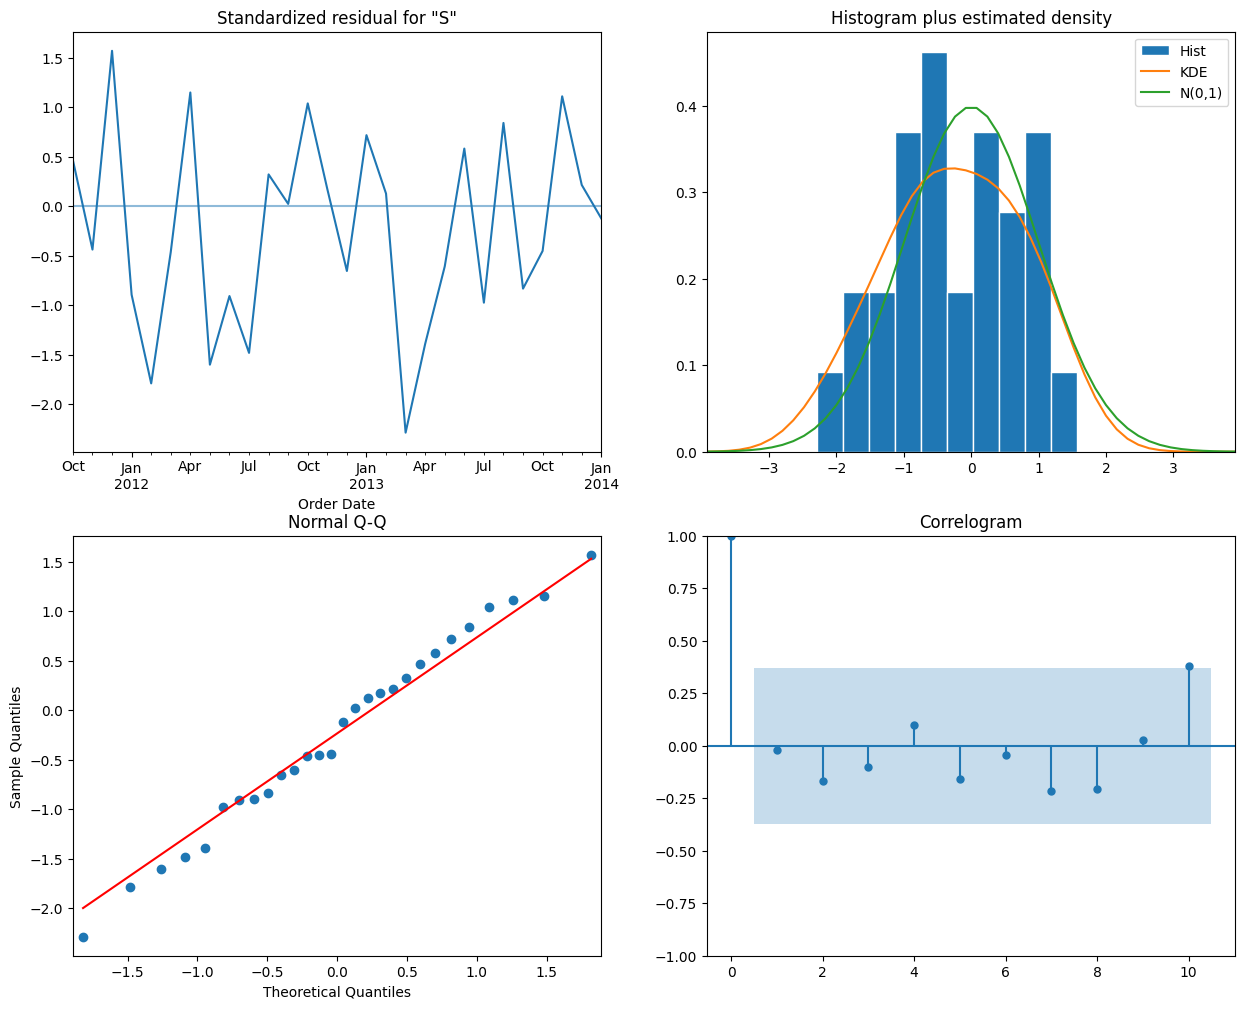

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print(round(results.aic,2))
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<Axes: xlabel='Order Date'>

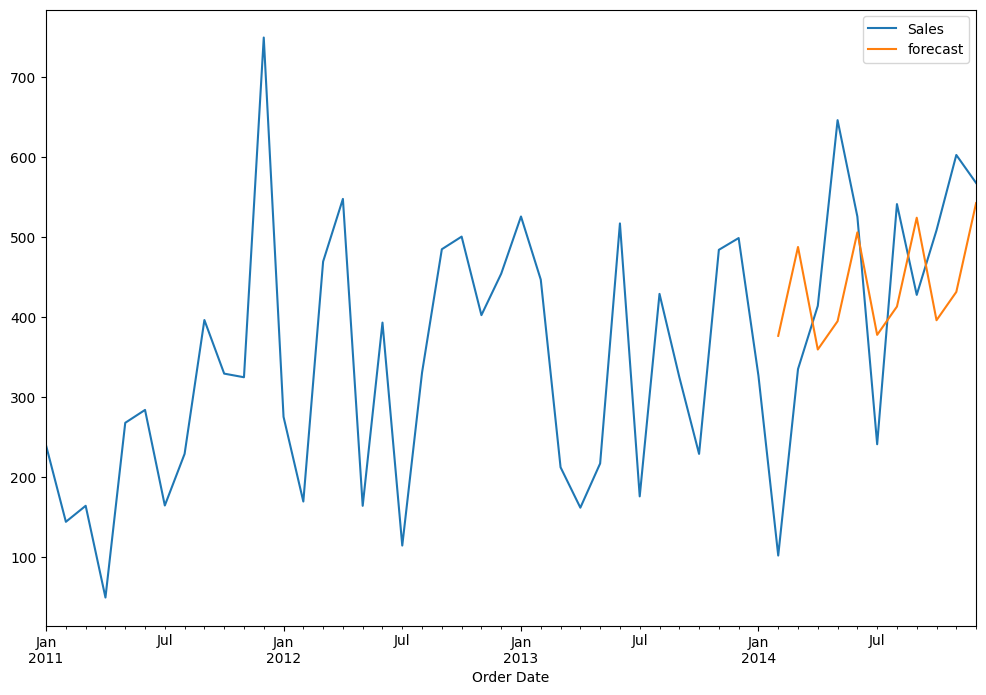

In [ ]:
datesm['forecast']=results.predict(start=37,end=47,dynamic=True)
datesm[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# root mean squared error or rmse
def measure_rmse(actual, predicted):
 return sqrt(mean_squared_error(actual, predicted))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
 return sqrt(mean_squared_error(actual, predicted))

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
measure_rmse(datesm.Sales[37:], datesm.forecast[37:])

151.48445228308321

In [ ]:
mean_absolute_percentage_error(datesm.Sales[37:], datesm.forecast[37:])

48.255054135135516

In [ ]:
model=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 0, 1),seasonal_order=(1,0,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Order Date'>

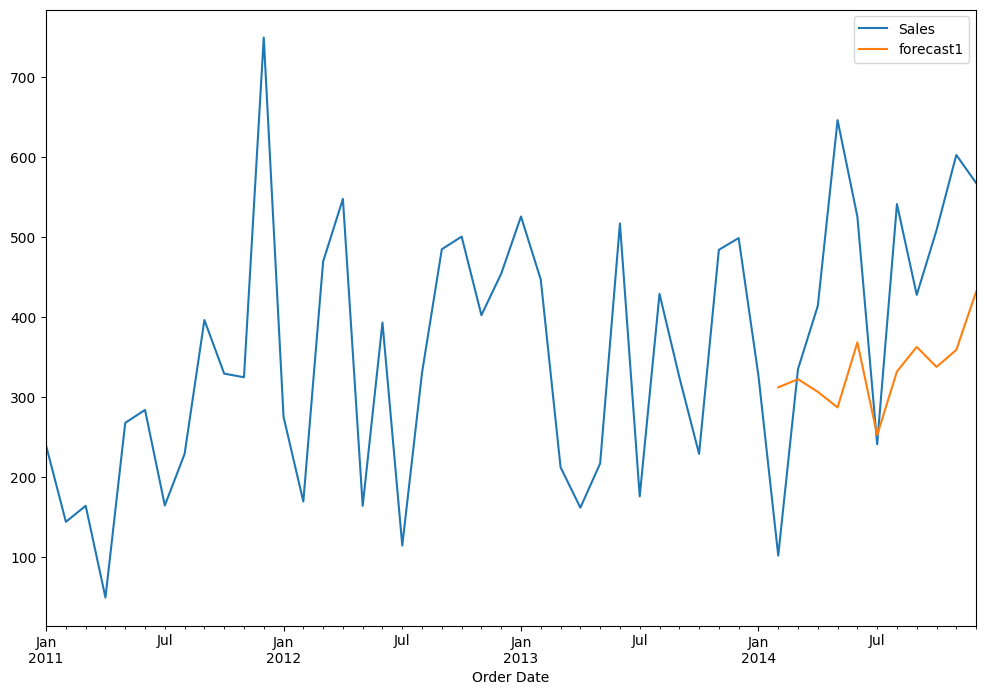

In [ ]:
datesm['forecast1']=results.predict(start=37,end=47,dynamic=True)
datesm[['Sales','forecast1']].plot(figsize=(12,8))

In [ ]:
measure_rmse(datesm.Sales[37:], datesm.forecast1[37:])

182.1696060629484

In [ ]:
mean_absolute_percentage_error(datesm.Sales[37:], datesm.forecast1[37:])

43.607765603579175

Prophet

In [ ]:
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
datesm.drop('forecast', axis = 1, inplace = True)
datesm.drop('forecast1', axis = 1, inplace = True)

In [ ]:
datesm = datesm.reset_index()
datesm.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)  # Переименование столбцов для Prophet

In [ ]:
datesm.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)  # Переименование столбцов для Prophet
train_len = 37
train = datesm[0:train_len]
test = datesm[train_len:]
# Создание и обучение модели
model3 = Prophet()
model3.fit(train)

# Создание будущего фрейма данных для прогноза
future = model3.make_future_dataframe(periods=11, freq='M')  # Здесь 12 - количество шагов вперед, freq='M' - месячная частота

# Генерация прогноза
forecast = model3.predict(future)

# Вывод результатов прогноза
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11))  # Здесь 12 - количество шагов вперед

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfppub9fd/iz_7ejo1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfppub9fd/6ol1jlm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39738', 'data', 'file=/tmp/tmpfppub9fd/iz_7ejo1.json', 'init=/tmp/tmpfppub9fd/6ol1jlm1.json', 'output', 'file=/tmp/tmpfppub9fd/prophet_model9kw9_3o7/prophet_model-20240420180931.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:09:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:09:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds        yhat  yhat_lower  yhat_upper
36 2014-01-31  408.574922  307.253822  513.288829
37 2014-02-28  331.670918  220.240573  430.917162
38 2014-03-31  323.696667  220.695358  432.038449
39 2014-04-30  254.528215  154.243942  360.887442
40 2014-05-31  336.266193  231.855127  442.179317
41 2014-06-30  457.440806  352.147942  561.422290
42 2014-07-31  241.204424  127.921699  345.702075
43 2014-08-31  372.486188  274.927953  475.560938
44 2014-09-30  453.061710  350.697829  563.739838
45 2014-10-31  387.383031  276.099925  486.990371
46 2014-11-30  445.234119  338.685763  546.779418
47 2014-12-31  708.272248  604.912758  816.972343


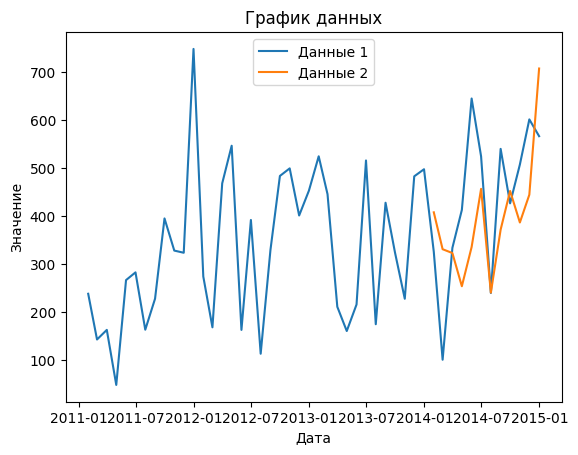

In [ ]:

# Создание графика
plt.plot(datesm['ds'], datesm['y'], label='Данные 1')
plt.plot(forecast['ds'].tail(12), forecast['yhat'].tail(12), label='Данные 2')

# Настройка графика
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График данных')
plt.legend()

# Отображение графика
plt.show()


In [ ]:
mean_absolute_percentage_error(datesm.y[37:], forecast.yhat[37:])

40.1795352793423

In [ ]:
measure_rmse(datesm.y[37:], forecast.yhat[37:])

155.78386737294417

LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [ ]:
datesm

,Sales
Order Date,
2011-01-31,195.947241
2011-02-28,44.865000
2011-03-31,80.980000
2011-04-30,24.803333
2011-05-31,230.122903
2011-06-30,263.896333
2011-07-31,111.170000
2011-08-31,235.655806
2011-09-30,362.338333


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(datesm.values.reshape(-1, 1))

In [ ]:
train_size = int(len(scaled_data) * 0.8)  # 80% данных для обучения, 20% для тестирования
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [ ]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(x), np.array(y)



In [ ]:
seq_length = 3  # Длина последовательности (количество временных шагов)
train_x, train_y = create_sequences(train_data, seq_length)
test_x, test_y = create_sequences(test_data, seq_length)

In [ ]:
model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(train_x.shape[1], 1)))
model.add(LSTM(units=20))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(train_x, train_y, epochs=30, batch_size=16, verbose=1)


Epoch 1/30
3/3 [==============================] - 4s 11ms/step - loss: 0.1876
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 0.1720
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 0.1569
Epoch 4/30
3/3 [==============================] - 0s 7ms/step - loss: 0.1436
Epoch 5/30
3/3 [==============================] - 0s 6ms/step - loss: 0.1311
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 0.1188
Epoch 7/30
3/3 [==============================] - 0s 6ms/step - loss: 0.1073
Epoch 8/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0961
Epoch 9/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0853
Epoch 10/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0771
Epoch 11/30
3/3 [==============================] - 0s 8ms/step - loss: 0.0691
Epoch 12/30
3/3 [==============================] - 0s 7ms/step - loss: 0.0634
Epoch 13/30
3/3 [==============================] - 0s 6ms/step - loss: 0

1/1 [==============================] - 0s 163ms/step
Mean Squared Error: 38769.700253534196


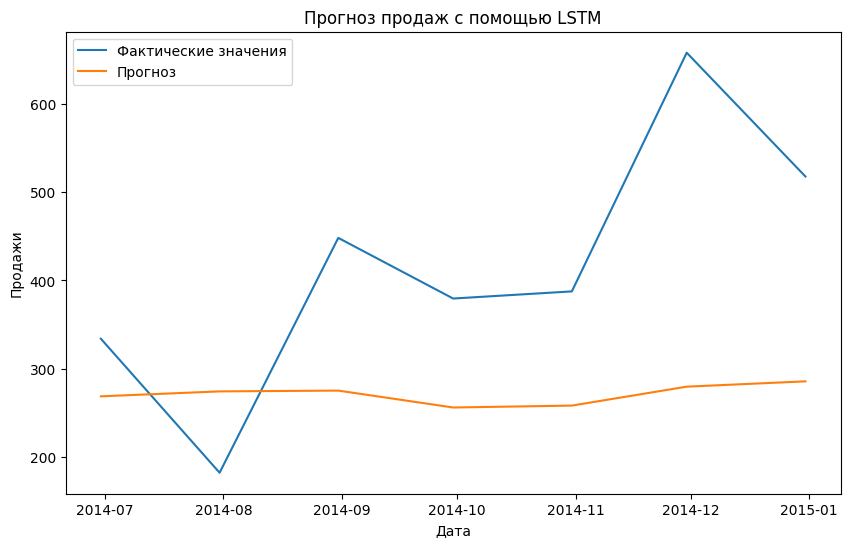

In [ ]:
# Прогнозирование на тестовом наборе данных
predictions = model.predict(test_x)
predictions = scaler.inverse_transform(predictions)  # Инвертирование масштабированных прогнозов
actual_values = scaler.inverse_transform(test_y.reshape(-1, 1))  # Инвертирование масштабированных фактических значений

# Расчет среднеквадратичной ошибки (MSE)
mse = np.mean((predictions - actual_values) ** 2)
print('Mean Squared Error:', mse)

# Построение графика с прогнозами и фактическими значениями
plt.figure(figsize=(10, 6))
plt.plot(datesm.index[len(train_data) + seq_length:], actual_values, label='Фактические значения')
plt.plot(datesm.index[len(train_data) + seq_length:], predictions, label='Прогноз')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.title('Прогноз продаж с помощью LSTM')
plt.legend()
plt.show()

LSTM norm for months


Epoch 0: train RMSE 367.2434, test RMSE 451.9593
Epoch 100: train RMSE 345.5483, test RMSE 428.9973
Epoch 200: train RMSE 328.8514, test RMSE 411.1803
Epoch 300: train RMSE 313.4727, test RMSE 394.6140
Epoch 400: train RMSE 298.8922, test RMSE 378.7359
Epoch 500: train RMSE 285.0358, test RMSE 363.4549
Epoch 600: train RMSE 271.7503, test RMSE 348.5855
Epoch 700: train RMSE 259.1514, test RMSE 334.2373
Epoch 800: train RMSE 247.2405, test RMSE 320.3916
Epoch 900: train RMSE 235.9812, test RMSE 306.9812
Epoch 1000: train RMSE 225.4513, test RMSE 294.0709
Epoch 1100: train RMSE 215.6515, test RMSE 281.6324
Epoch 1200: train RMSE 206.6589, test RMSE 269.7353
Epoch 1300: train RMSE 198.5099, test RMSE 258.4053
Epoch 1400: train RMSE 191.2208, test RMSE 247.6474
Epoch 1500: train RMSE 184.8925, test RMSE 237.6148
Epoch 1600: train RMSE 179.5149, test RMSE 228.3311
Epoch 1700: train RMSE 175.0527, test RMSE 219.8027
Epoch 1800: train RMSE 171.4833, test RMSE 212.1005
Epoch 1900: train RMSE 1

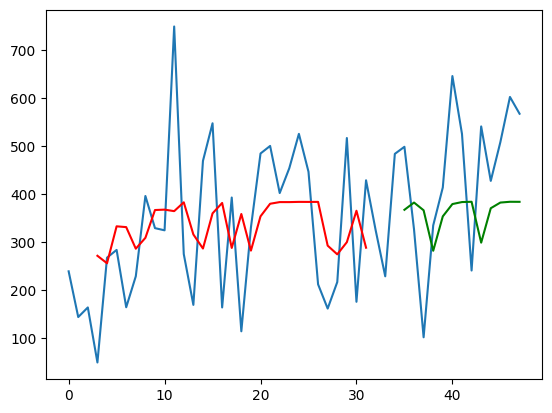

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

timeseries = datesm[['Sales']].values.astype('float32')

# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

lookback = 3
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 3000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()

In [ ]:
pred = []
for i in test_plot:
  if i[0] > 0:
    pred.append(i[0])
pred

[367.02496,
 382.16013,
 366.03418,
 281.6577,
 353.35785,
 378.99695,
 383.1751,
 383.76782,
 298.57642,
 370.3163,
 382.1313,
 383.7558,
 383.6548]

In [ ]:
pred = []
for i in test_plot:
  if i[0] > 0:
    pred.append(i[0])

real = []
for i in timeseries[-13:]:
  real.append(i[0])


[498.34225,
 326.24838,
 101.3325,
 334.53192,
 413.56534,
 645.7661,
 525.17566,
 240.49097,
 540.80255,
 427.28635,
 508.11646,
 602.2293,
 567.23615]

In [ ]:
mean_absolute_percentage_error(pred, real)

41.352251172065735

In [ ]:
measure_rmse(pred, real)

168.23525659771795

Epoch 0: train RMSE 727.5643, test RMSE 779.5196
Epoch 100: train RMSE 687.6711, test RMSE 715.1376
Epoch 200: train RMSE 687.6921, test RMSE 715.4297
Epoch 300: train RMSE 687.6663, test RMSE 715.3049
Epoch 400: train RMSE 687.6572, test RMSE 715.2508
Epoch 500: train RMSE 687.3015, test RMSE 714.7521
Epoch 600: train RMSE 687.1185, test RMSE 714.7997
Epoch 700: train RMSE 686.9001, test RMSE 714.2348
Epoch 800: train RMSE 686.6158, test RMSE 714.7606
Epoch 900: train RMSE 686.3410, test RMSE 714.6858


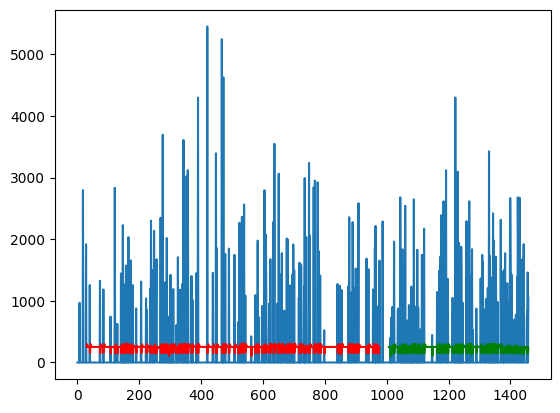

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

timeseries = dates[['Sales']].values.astype('float32')

# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

lookback = 30
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()

In [ ]:
mean_absolute_percentage_error(predictions, actual_values)

133.50949351905925

In [ ]:
measure_rmse(actual_values, predictions)

701.6226358433247

Gradien boosting

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
datesm.set_index('Order Date', inplace=True)

In [ ]:
datesm['Год'] = datesm.index.year
datesm['Месяц'] = datesm.index.month
datesm['День'] = datesm.index.day
datesm['День_недели'] = datesm.index.weekday


In [ ]:
sales_data = datesm['Sales']
sales_data

In [ ]:
train_data = datesm.loc[datesm.index < '2014-02-01']
test_data = datesm.loc[datesm.index >= '2014-02-01']
train_target = sales_data.loc[sales_data.index < '2014-02-01']
test_target = sales_data.loc[sales_data.index >= '2014-02-01']

In [ ]:
model = XGBRegressor()
model.fit(train_data.drop('Sales', axis=1), train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

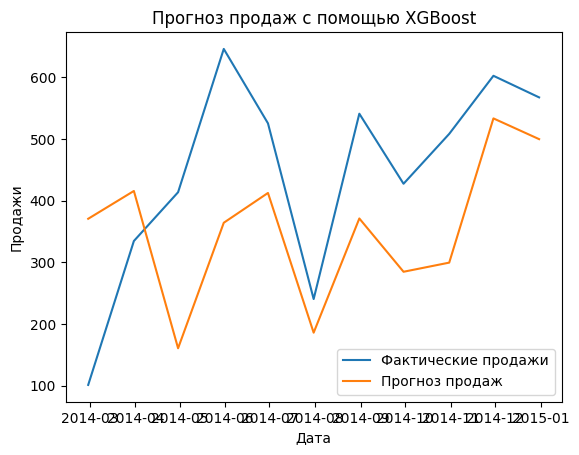

In [ ]:
predictions = model.predict(test_data.drop('Sales', axis=1))

# Визуализация прогноза
plt.plot(test_data.index, test_target, label='Фактические продажи')
plt.plot(test_data.index, predictions, label='Прогноз продаж')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.title('Прогноз продаж с помощью XGBoost')
plt.legend()
plt.show()


In [ ]:
mean_absolute_percentage_error(test_target, predictions)

51.63805480620475

In [ ]:
measure_rmse(test_target, predictions)

175.81575515642132